In [182]:
import os
import numpy as np
import pandas as pd
import astropy.io.fits as pyfits
import gvar as gv
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from scipy.stats import t
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
from ClassStatistic import MyStatistic

In [2]:
PATH_CAT_CROSSMATCH = '../Data/COSMOS/Catalog/CrossMatch/'
PATH_CAT_VLA = '../Data/COSMOS/Catalog/radio_VLA/'
PATH_DATA    = '../Data/'
PATH_FIGURE  = '../Figures/'
PATH_TABLE   = '../Data/Tables/'

# df_450um_Lim   = pd.read_csv('%scosmos_match_450um_Lim_1d4GHzXS_3GHzlp.csv'%(PATH_CAT_CROSSMATCH))
# df_450um_Ugne  = pd.read_csv('%scosmos_match_450um_SEDUgne_Lim_1d4GHzXS_3GHzlp.csv'%(PATH_CAT_CROSSMATCH))
# df_450um_Gao   = pd.read_csv('%scosmos_match_450um_Gao_Lim_1d4GHzXS_3GHzlp.csv'%(PATH_CAT_CROSSMATCH))
df_450um_Ugne   = pd.read_csv('%scosmos_match_Ugne_comb.csv'%(PATH_CAT_CROSSMATCH))
df_450um_Lim    = pd.read_csv('%scosmos_match_Lim_comb.csv'%(PATH_CAT_CROSSMATCH))
df_450um_Gao    = pd.read_csv('%scosmos_match_Gao_comb.csv'%(PATH_CAT_CROSSMATCH))
df_850um_Ugne   = pd.read_csv('%sAS2UDS_match_r1d6arcs_detected_1d4GHz.csv'%(PATH_DATA))

df_1d4GHz_dp = pd.read_csv('%scosmos_vla_1d4GHz_dp_2011cat.csv'%(PATH_CAT_VLA))
df_1d4GHz_XS = pd.read_csv('%scosmos_vla_1d4GHz_XS_2021cat.csv'%(PATH_CAT_VLA))
df_3GHz_lp   = pd.read_csv('%scosmos_vla_3GHz_2017cat.csv'%(PATH_CAT_VLA))

In [227]:
df_1d4GHz_XS_dp

,Source_id_1d4GHz,Isl_id_1d4GHz,RA_1d4GHz_1,E_RA_1d4GHz,DEC_1d4GHz_1,E_DEC_1d4GHz,Total_flux_1d4GHz,E_Total_flux_1d4GHz,Peak_flux_1d4GHz,E_Peak_flux_1d4GHz,...,MIRAGN_3GHz_multiAGN,SEDAGN_3GHz_multiAGN,QMLAGN_3GHz_multiAGN,SFG_3GHz_multiAGN,CleanSFG_3GHz_multiAGN,HLAGN_3GHz_multiAGN,MLAGN_3GHz_multiAGN,RExcess_3GHz_multiAGN,flagC15_3GHz_multiAGN,Separation
0,1200,1213,150.086056,6.074653e-06,2.649182,7.816312e-06,0.000074,0.000005,0.000058,0.000002,...,False,False,False,True,True,False,False,False,0.0,0.057786
1,884,914,150.143224,1.415498e-06,2.356036,2.025034e-06,0.000288,0.000004,0.000207,0.000002,...,False,False,False,True,False,False,True,True,0.0,0.075585
2,185,202,150.324455,4.143680e-05,2.393456,4.519292e-05,0.000025,0.000005,0.000011,0.000002,...,False,True,False,False,False,True,False,True,0.0,0.280816
3,2027,2055,149.918876,6.435489e-05,2.760525,3.023933e-05,0.000060,0.000009,0.000012,0.000002,...,False,False,False,True,True,False,False,False,0.0,0.190434
4,891,921,150.141644,2.685384e-06,2.446059,3.588674e-06,0.000126,0.000004,0.000108,0.000002,...,False,False,True,False,False,False,True,True,0.0,0.063301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,530,551,150.228642,1.281664e-05,2.553864,8.349026e-06,0.000059,0.000005,0.000038,0.000002,...,False,False,False,True,True,False,False,False,0.0,0.153247
604,1788,1815,149.977868,3.178954e-07,2.504250,2.867593e-07,0.001539,0.000006,0.001297,0.000002,...,False,True,False,False,False,True,False,True,0.0,0.038595
605,1797,1824,149.976018,8.879946e-07,2.410586,1.103094e-06,0.000437,0.000004,0.000347,0.000002,...,False,False,False,True,False,False,True,True,0.0,0.064931
606,875,905,150.144753,1.139392e-05,2.656069,1.332467e-05,0.000043,0.000005,0.000034,0.000002,...,False,True,False,False,False,True,False,False,1.0,0.123782


In [409]:
df_1d4GHz_XS_lpv1 = pd.read_csv('%scosmos_match_vla_1d4GHz_XS_lpv1_3GHzlp_AGN.csv'%(PATH_CAT_CROSSMATCH))
df_1d4GHz_XS_dp   = pd.read_csv('%scosmos_match_vla_1d4GHz_XS_dp_3GHzlp_AGN.csv'%(PATH_CAT_CROSSMATCH))
df_1d4GHz_dp_lpv1   = pd.read_csv('%scosmos_match_vla_1d4GHz_dp_lpv1_3GHzlp_AGN.csv'%(PATH_CAT_CROSSMATCH))

df_Ugne_lpv1 = pd.read_csv('%scosmos_match_Ugne_comb_1d4GHzlpv1.csv'%(PATH_CAT_CROSSMATCH))
df_Ugne_dp = pd.read_csv('%scosmos_match_Ugne_comb_1d4GHzdp.csv'%(PATH_CAT_CROSSMATCH))

def drop_mult_1d4GHz_dp(df):
    df_drop = df.drop(df[df.mult_1d4GHz == 1].index)
    return df_drop

def drop_mult_1d4GHz_lpv1(df):
    df_drop = df.drop(df[df.mult_1d4GHz_lpv1 == 1].index)
    return df_drop

df_1d4GHz_XS_lpv1 = drop_mult_1d4GHz_lpv1(df_1d4GHz_XS_lpv1)
df_1d4GHz_XS_dp   = drop_mult_1d4GHz_dp(df_1d4GHz_XS_dp)
df_1d4GHz_dp_lpv1 = drop_mult_1d4GHz_dp(df_1d4GHz_dp_lpv1)
df_1d4GHz_dp_lpv1 = drop_mult_1d4GHz_lpv1(df_1d4GHz_dp_lpv1)
df_Ugne_lpv1      = drop_mult_1d4GHz_dp(df_Ugne_lpv1)
df_Ugne_lpv1      = drop_mult_1d4GHz_lpv1(df_Ugne_lpv1)

def remove_n99(df, col_name):
    df[col_name] = np.where(df[col_name]<0, 0, df[col_name])

remove_n99(df_1d4GHz_XS_lpv1, 'ferr_1d4GHz_lpv1')
remove_n99(df_Ugne_lpv1, 'ferr_1d4GHz_lpv1')

remove_n99(df_1d4GHz_XS_dp, 'ferr_1d4GHz')
remove_n99(df_Ugne_dp, 'ferr_1d4GHz_1')

remove_n99(df_1d4GHz_dp_lpv1, 'ferr_1d4GHz_lpv1')
remove_n99(df_1d4GHz_dp_lpv1, 'ferr_1d4GHz')

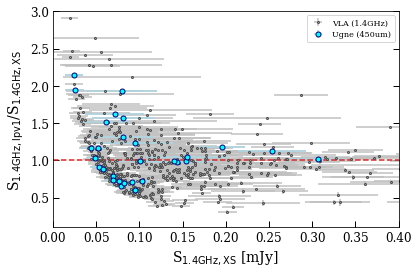

In [4]:
'flux_1d4GHz_lpv1', 'ferr_1d4GHz_lpv1', 'flux_1d4GHz', 'ferr_1d4GHz', 'Flux_corr_1d4GHz', 'Eflux_corr_1d4GHz'

plot_flux = 'lpv1_XS'
# plot_flux = 'dp_XS'
# plot_flux = 'lpv1_dp'

fn_savefig = 'cosmos_450um_S1d4GHz_%s'%(plot_flux)


is_ratio = True
# is_ratio = False
# is_log = True
is_log = False

fig = plt.figure()
plt.rcParams["font.family"] = "serif"
ax  = fig.add_axes([0.12,0.12,0.8,0.75]) # left, bottom, width, height (range 0 to 1)



if is_ratio:
    fn_savefig = 'cosmos_450um_S1d4GHz_%s_ratio'%(plot_flux)
    xlim_low, xlim_up = 0, 0.4
    if plot_flux == 'lpv1_XS':
        y_arr  = df_1d4GHz_XS_lpv1['flux_1d4GHz_lpv1']/(df_1d4GHz_XS_lpv1['Flux_corr_1d4GHz']*1e3)
        y2_arr = df_Ugne_lpv1['flux_1d4GHz_lpv1']/(df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3)
        ax.set_ylabel(r'S$_{\rm 1.4 GHz, lpv1}$/S$_{\rm 1.4 GHz, XS}$', fontsize=14)
    elif plot_flux == 'dp_XS':
        y_arr  = df_1d4GHz_XS_dp['flux_1d4GHz']/(df_1d4GHz_XS_dp['Flux_corr_1d4GHz']*1e3)
        y2_arr = df_Ugne_lpv1['flux_1d4GHz']/(df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3)  
        ax.set_ylabel(r'S$_{\rm 1.4 GHz, dp}$/S$_{\rm 1.4 GHz, XS}$', fontsize=14)
    elif plot_flux == 'lpv1_dp':
        y_arr  = df_1d4GHz_dp_lpv1['flux_1d4GHz_lpv1']/(df_1d4GHz_dp_lpv1['flux_1d4GHz'])
        y2_arr = df_Ugne_lpv1['flux_1d4GHz_lpv1']/(df_Ugne_lpv1['flux_1d4GHz'])
        ax.set_ylabel(r'S$_{\rm 1.4 GHz, lpv1}$/S$_{\rm 1.4 GHz, dp}$', fontsize=14)
    
    x_line = np.linspace(xlim_low, xlim_up, 20)
    ax.plot(x_line, x_line*0+1, '--', color='tab:red')
    
    ax.set_xlim(xlim_low, xlim_up)
    ax.set_ylim(0.1, 3)
    
else:
    if is_log:
        fn_savefig = 'cosmos_450um_S1d4GHz_%s_log'%(plot_flux)
        xlim_low, xlim_up = 1e-2, 5e1
        ax.set_xlim(xlim_low, xlim_up)     
        ax.loglog()
    else:
        fn_savefig = 'cosmos_450um_S1d4GHz_%s'%(plot_flux)
        xlim_low, xlim_up = 0, 0.4
        ax.set_xlim(xlim_low, xlim_up) 
    if plot_flux == 'lpv1_XS':
        y_arr  = df_1d4GHz_XS_lpv1['flux_1d4GHz_lpv1']
        y2_arr = df_Ugne_lpv1['flux_1d4GHz_lpv1']
        ax.set_ylabel(r'S$_{\rm 1.4 GHz, lpv1}$ [mJy]', fontsize=14)
    elif plot_flux == 'dp_XS':
        y_arr  = df_1d4GHz_XS_dp['flux_1d4GHz']
        y2_arr = df_Ugne_lpv1['flux_1d4GHz'] 
        ax.set_ylabel(r'S$_{\rm 1.4 GHz, dp}$ [mJy]', fontsize=14)
    elif plot_flux == 'lpv1_dp':
        y_arr  = df_1d4GHz_dp_lpv1['flux_1d4GHz_lpv1']
        y2_arr = df_Ugne_lpv1['flux_1d4GHz_lpv1'] 
        ax.set_ylabel(r'S$_{\rm 1.4 GHz, lpv1}$ [mJy]', fontsize=14)

    
    x_line = np.linspace(xlim_low, xlim_up, 20)
    ax.plot(x_line, x_line, '--', color='tab:red')
    
    ax.set_ylim(xlim_low, xlim_up)
    

    
if plot_flux == 'lpv1_XS':    
    x_arr    = df_1d4GHz_XS_lpv1['Flux_corr_1d4GHz']*1e3
    xerr_arr = df_1d4GHz_XS_lpv1['Eflux_corr_1d4GHz']*1e3
    yerr_arr = df_1d4GHz_XS_lpv1['ferr_1d4GHz_lpv1']
    
    x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
    x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
    y2err_arr = df_Ugne_lpv1['ferr_1d4GHz_lpv1']
    ax.set_xlabel(r'S$_{\rm 1.4 GHz, XS}$ [mJy]', fontsize=14)
elif plot_flux == 'dp_XS':
    x_arr    = df_1d4GHz_XS_dp['Flux_corr_1d4GHz']*1e3
    xerr_arr = df_1d4GHz_XS_dp['Eflux_corr_1d4GHz']*1e3
    yerr_arr = df_1d4GHz_XS_dp['ferr_1d4GHz']

    x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
    x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
    y2err_arr = df_Ugne_lpv1['ferr_1d4GHz']
    ax.set_xlabel(r'S$_{\rm 1.4 GHz, XS}$ [mJy]', fontsize=14)
elif plot_flux == 'lpv1_dp':
    x_arr    = df_1d4GHz_dp_lpv1['flux_1d4GHz']
    xerr_arr = df_1d4GHz_dp_lpv1['ferr_1d4GHz']
    yerr_arr = df_1d4GHz_dp_lpv1['ferr_1d4GHz_lpv1']

    x2_arr    = df_Ugne_lpv1['flux_1d4GHz']
    x2err_arr = df_Ugne_lpv1['ferr_1d4GHz']
    y2err_arr = df_Ugne_lpv1['ferr_1d4GHz_lpv1']
    ax.set_xlabel(r'S$_{\rm 1.4 GHz, dp}$ [mJy]', fontsize=14)


ax.errorbar(x_arr, y_arr,
            xerr_arr, yerr_arr,
            fmt='o', markersize=2,
            color = 'darkgray', markeredgecolor = '#4F4F4F', ecolor ='silver', 
            label='VLA (1.4GHz)')

ax.errorbar(x2_arr, y2_arr,
            x2err_arr, y2err_arr,
            fmt='o', markersize=5, 
            color = 'cyan', markeredgecolor = 'navy', ecolor ='lightblue', 
            label='Ugne (450um)')
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize=12, top=False, right=True)
ax.tick_params(which='minor', direction='in', length=4, width=1, labelsize=12, top=False, right=True)
plt.legend(fontsize=8, loc='upper right')
plt.savefig('%s%s.pdf'%(PATH_FIGURE, fn_savefig))    
plt.show()

In [488]:
def replace_mask(data, mask, default_value):
    data_replace = data.copy()
    data_replace[mask] = default_value
    return data_replace

def remove_mask(data, mask):
    data_nonan = data.copy()
    data_nonan = data[mask]
    return data_nonan

def clip_threshold_arr(data, upper_threshold, lower_threshold, default_value, return_mask=False):
    mask = (data > upper_threshold) | (data < lower_threshold)
    data_clip  = replace_mask(data, mask, default_value)
    if return_mask:
        return data_clip, mask
    return data_clip
    
def remove_nan(data, return_mask=False):
    mask = ~np.isnan(data)
    data_nonan = remove_mask(data, mask)
    if return_mask:
        return data_nonan, mask
    return data_nonan

def remove_xynan(xdata, ydata, xerrdata=None, yerrdata=None, return_mask=False):
    mask = ~np.isnan(xdata) & ~np.isnan(ydata)
    xdata_nonan = remove_mask(xdata, mask)
    ydata_nonan = remove_mask(ydata, mask)
    xerrdata_nonan = np.nan
    yerrdata_nonan = np.nan
    if xerrdata is not None:
        xerrdata_nonan = remove_mask(xerrdata, mask)
    if yerrdata is not None:
        yerrdata_nonan = remove_mask(yerrdata, mask)
    return xdata_nonan, ydata_nonan, xerrdata_nonan, yerrdata_nonan


def func_binning(x_arr, y_arr, bin_num):

    # x_arr = z_arr
    # y_arr = q_IR_IR
    # bins_axis = x
    
    #
    x_add_arr    = np.empty(bin_num - len(x_arr)%bin_num)
    x_add_arr[:] = np.nan
    x_arr        = np.concatenate((x_arr, x_add_arr), axis=None)
    
    y_add_arr    = np.empty(bin_num - len(y_arr)%bin_num)
    y_add_arr[:] = np.nan
    y_arr        = np.concatenate((y_arr, y_add_arr), axis=None)

    # mean binning
    xy_2d_arr      = np.vstack((x_arr, y_arr)).T
    x_ord_y_2d_arr = xy_2d_arr[xy_2d_arr[:,0].argsort()]
    x_ord_x        = x_ord_y_2d_arr.T[0]
    y_ord_x        = x_ord_y_2d_arr.T[1] 

    #bin_num = 10
#     xbin_m   = np.nanmean(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
#     xbin_std = np.nanstd(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
#     ybin_m   = np.nanmean(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
#     ybin_std = np.nanstd(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    xbin_m   = np.nanmedian(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    xbin_std = np.nanstd(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    ybin_m   = np.nanmedian(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    ybin_std = np.nanstd(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)

#     xbin_m, xbin_m_bs = bootstrap_error(arr=med_arr, number=1000)
#     bs_low, bs_up     = median_bs[0], median_bs[1]



    xbin_m, ybin_m, xbin_std, ybin_std = \
    remove_xynan(xbin_m, ybin_m, xerrdata=xbin_std, yerrdata=ybin_std)
    
    return xbin_m, xbin_std, ybin_m, ybin_std

[[-0.00099758 -0.00030081 -0.00063284 -0.00295982 -0.00319228 -0.03782579]
 [ 0.00137585  0.00107829  0.00080185  0.00323649  0.007521    0.05150835]]
[[-0.002  -0.002  -0.0025 -0.005  -0.0095 -0.064 ]
 [ 0.0015  0.0015  0.001   0.0035  0.004   0.0275]]


/usr/local/anaconda3/envs/astro37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


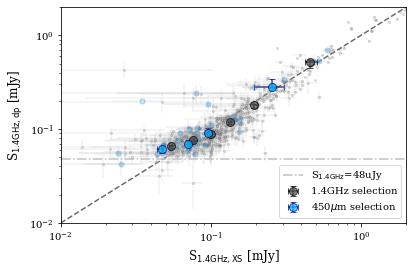

In [804]:
x_arr    = df_1d4GHz_XS_dp['Flux_corr_1d4GHz']*1e3
xerr_arr = df_1d4GHz_XS_dp['Eflux_corr_1d4GHz']*1e3
y_arr    = df_1d4GHz_XS_dp['flux_1d4GHz']#/x_arr
yerr_arr = df_1d4GHz_XS_dp['ferr_1d4GHz']

x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
y2_arr    = df_Ugne_lpv1['flux_1d4GHz']#/x2_arr 
y2err_arr = df_Ugne_lpv1['ferr_1d4GHz']

fig = plt.figure()
plt.rcParams["font.family"] = "serif"
ax  = fig.add_axes([0.12,0.12,0.8,0.75]) # left, bottom, width, height (range 0 to 1)

ax.errorbar(x_arr, y_arr,
            yerr_arr, yerr_arr, 
            fmt='o', markersize=2, alpha = 0.2,
            color = 'darkgray', markeredgecolor = '#4F4F4F', ecolor ='silver', 
#             label='VLA (1.4GHz)'
#             label='VLA (1.4GHz), #=%d'%(len(x_arr))
            )


try:
    med_arr = y_arr.to_numpy()
except AttributeError:
    med_arr = y_arr
median, median_bs = bootstrap_error(arr=med_arr, number=1000)
bs_low, bs_up     = median_bs[0], median_bs[1]
# ax.plot(x_line, x_line*0 + median, 
#         linestyle='--', linewidth=2, color = '#4F4F4F', alpha = 0.8, zorder=10,\
#         label=r'$S_{\rm ratio}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
#        )


ax.errorbar(x2_arr, y2_arr,
            x2err_arr, y2err_arr,
            fmt='o', markersize=5, alpha=0.2,
            color = 'deepskyblue', markeredgecolor = 'navy', ecolor ='lightblue', 
#             label='Ugne (450um) samples',
#             label='Ugne (450um), #=%d'%(len(x2_arr))
           )

try:
    med_arr = y2_arr.to_numpy()
except AttributeError:
    med_arr = y2_arr
median, median_bs = bootstrap_error(arr=med_arr, number=1000)
bs_low, bs_up     = median_bs[0], median_bs[1]
# ax.plot(x_line, x_line*0 + median, 
#         linestyle='--', linewidth=2, color = 'cyan', alpha = 0.8, zorder=10,\
#         label=r'$S_{\rm ratio}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
#        )

xbin_m, xbin_std, ybin_m, ybin_std = func_binning(x_arr, y_arr, bin_num=100)
# print(xbin_m)
# print(xbin_m+xbin_std[:].T)
print(xbin_std.T)
print(ybin_std.T)
ax.errorbar(xbin_m[:], ybin_m[:],\
            xerr=np.abs(xbin_std).T,\
            yerr=np.abs(ybin_std).T,\
            fmt='o', color='#4F4F4F', ecolor = 'k', alpha=0.7,\
            markersize=8, markeredgecolor='k', markeredgewidth=1, capsize=3,\
            label='1.4GHz selection'
           )
# ax.fill_between(xbin_m, \
#                 ybin_m+ybin_std.T[0], \
#                 ybin_m+ybin_std.T[1], \
#                 color='k', alpha=0.6, \
#                )

# xbin_m, xbin_std, ybin_m, ybin_std = func_binning(x_arr[i], y_arr[i], bin_num=12)
#         xbin_std = np.nan_to_num(xbin_std)
#         ybin_std = np.nan_to_num(ybin_std)
#         ax.errorbar(xbin_m, ybin_m,\
#                     xerr=np.abs(xbin_std).T,\
#                     yerr=np.abs(ybin_std).T,\
#                     fmt='o', color='#4F4F4F', ecolor = 'k', alpha=0.8,\
#                     markersize=8, markeredgecolor='k', markeredgewidth=1, capsize=3,\
#                     label=r'450$\mu$m selection', 
#                     zorder=20
#                    )


x2bin_m, x2bin_std, y2bin_m, y2bin_std = func_binning(x2_arr, y2_arr, bin_num=9)
ax.errorbar(x2bin_m[:], y2bin_m[:],\
            xerr=np.abs(x2bin_std.T),\
            yerr=np.abs(y2bin_std.T),\
            fmt='o', color = 'deepskyblue', markeredgecolor = 'navy', ecolor ='navy', 
            markersize=8, markeredgewidth=1, capsize=3, alpha=0.7,
            label=r'450$\mu$m selection'
           )

# ax.fill_between(x2bin_m, \
#                 y2bin_m+y2bin_std.T[0], \
#                 y2bin_m+y2bin_std.T[1], \
#                 color='deepskyblue', alpha=0.4, \
#                )

x_line = np.linspace(xlim_low, xlim_up, 20)
ax.plot(x_line, x_line, '--', color='dimgray', zorder=1)
# ax.plot(x_line, x_line*0+1, '--', color='tab:red', zorder=10)
# S_1d4GHZ_DET_LIMIT      = 5*1.8e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10
S_1d4GHZ_DET_LIMIT      = 12*4e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10
ax.plot(x_line, x_line*0+S_1d4GHZ_DET_LIMIT, '-.', color='silver', zorder=1, 
        label=r'S$_{\rm 1.4GHz}$=%duJy'%(S_1d4GHZ_DET_LIMIT*1e3))




xlim_low, xlim_up = 1e-2, 2e0
ax.set_xlim(xlim_low, xlim_up) 
ax.set_ylim(xlim_low, xlim_up)
 
# xlim_low, xlim_up = 0, 0.4
# ylim_low, ylim_up = 0, 2
# ax.set_xlim(xlim_low, xlim_up) 
# ax.set_ylim(ylim_low, ylim_up)

ax.loglog()
ax.set_xlabel(r'S$_{\rm 1.4 GHz, XS}$ [mJy]', fontsize=12)
ax.set_ylabel(r'S$_{\rm 1.4 GHz, dp}$ [mJy]', fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.savefig('./test_S_ratio.pdf')

[0.05399676 0.07611963 0.10023155 0.13333009 0.1942344  0.45900783]
[[0.05299919 0.0758274  0.09953334 0.13037027 0.19141206 0.42118204]
 [0.05535276 0.07723994 0.10099255 0.13656252 0.20182244 0.51051618]]


/usr/local/anaconda3/envs/astro37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


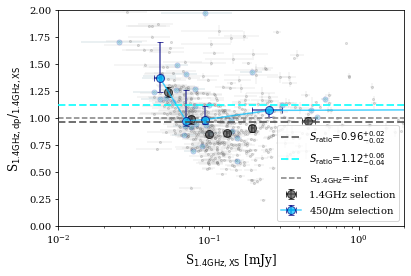

In [809]:
x_arr    = df_1d4GHz_XS_dp['Flux_corr_1d4GHz']*1e3
xerr_arr = df_1d4GHz_XS_dp['Eflux_corr_1d4GHz']*1e3
y_arr    = df_1d4GHz_XS_dp['flux_1d4GHz']/x_arr
yerr_arr = df_1d4GHz_XS_dp['ferr_1d4GHz']

x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
y2_arr    = df_Ugne_lpv1['flux_1d4GHz']/x2_arr 
y2err_arr = df_Ugne_lpv1['ferr_1d4GHz']

# lower_threshold = 0.06
lower_threshold = -np.inf
upper_threshold = np.inf
default_value = np.nan

x_clip_arr, mask_clip= clip_threshold_arr(x_arr, upper_threshold, lower_threshold, default_value, return_mask=True)
xerr_clip_arr = replace_mask(xerr_arr, mask_clip, default_value)
y_clip_arr    = replace_mask(y_arr, mask_clip, default_value)
yerr_clip_arr = replace_mask(yerr_arr, mask_clip, default_value)

# x_clip_arr    = remove_nan(x_clip_arr, return_mask=False)

x2_clip_arr, mask2_clip= clip_threshold_arr(x2_arr, upper_threshold, lower_threshold, default_value, return_mask=True)
x2err_clip_arr = replace_mask(x2err_arr, mask2_clip, default_value)
y2_clip_arr    = replace_mask(y2_arr, mask2_clip, default_value)
y2err_clip_arr = replace_mask(y2err_arr, mask2_clip, default_value)

x_arr = x_clip_arr
y_arr = y_clip_arr
xerr_arr = xerr_clip_arr
yerr_arr = yerr_clip_arr

x2_arr = x2_clip_arr
y2_arr = y2_clip_arr
x2err_arr = x2err_clip_arr
y2err_arr = y2err_clip_arr


fig = plt.figure()
plt.rcParams["font.family"] = "serif"
ax  = fig.add_axes([0.12,0.12,0.8,0.75]) # left, bottom, width, height (range 0 to 1)

ax.errorbar(x_arr, y_arr,
            yerr_arr, yerr_arr, 
            fmt='o', markersize=2, alpha = 0.2,
            color = 'darkgray', markeredgecolor = '#4F4F4F', ecolor ='silver', 
#             label='VLA (1.4GHz)'
#             label='VLA (1.4GHz), #=%d'%(len(x_arr))
            )


try:
    med_arr = y_arr.to_numpy()
except AttributeError:
    med_arr = y_arr
median, median_bs = bootstrap_error(arr=med_arr, number=1000)
bs_low, bs_up     = median_bs[0], median_bs[1]
ax.plot(x_line, x_line*0 + median, 
        linestyle='--', linewidth=2, color = '#4F4F4F', alpha = 0.8, zorder=10,\
        label=r'$S_{\rm ratio}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
       )


ax.errorbar(x2_arr, y2_arr,
            x2err_arr, y2err_arr,
            fmt='o', markersize=5, alpha=0.2,
            color = 'deepskyblue', markeredgecolor = 'navy', ecolor ='lightblue', 
#             label='Ugne (450um) samples',
#             label='Ugne (450um), #=%d'%(len(x2_arr))
           )

try:
    med_arr = y2_arr.to_numpy()
except AttributeError:
    med_arr = y2_arr
median, median_bs = bootstrap_error(arr=med_arr, number=1000)
bs_low, bs_up     = median_bs[0], median_bs[1]
ax.plot(x_line, x_line*0 + median, 
        linestyle='--', linewidth=2, color = 'cyan', alpha = 0.8, zorder=10,\
        label=r'$S_{\rm ratio}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
       )

xbin_m, xbin_std, ybin_m, ybin_std = func_binning(x_arr, y_arr, bin_num=100)
print(xbin_m)
print(xbin_m+xbin_std[:].T)
ax.errorbar(xbin_m[:], ybin_m[:],\
            xerr=np.abs(xbin_std).T,\
            yerr=np.abs(ybin_std).T,\
            fmt='o', color='#4F4F4F', ecolor = 'k', alpha=0.7,\
            markersize=8, markeredgecolor='k', markeredgewidth=1, capsize=3,\
            label='1.4GHz selection'
           )
# ax.fill_between(xbin_m, \
#                 ybin_m+ybin_std.T[0], \
#                 ybin_m+ybin_std.T[1], \
#                 color='k', alpha=0.6, \
#                )


x2bin_m, x2bin_std, y2bin_m, y2bin_std = func_binning(x2_arr, y2_arr, bin_num=9)
ax.errorbar(x2bin_m[:], y2bin_m[:],\
            xerr=np.abs(x2bin_std.T),\
            yerr=np.abs(y2bin_std.T),\
            fmt='o-', color = 'deepskyblue', markeredgecolor = 'navy', ecolor ='navy', 
            markersize=8, markeredgewidth=1, capsize=3, alpha=0.7,
            label=r'450$\mu$m selection'
           )

# ax.fill_between(x2bin_m, \
#                 y2bin_m+y2bin_std.T[0], \
#                 y2bin_m+y2bin_std.T[1], \
#                 color='dodgerblue', alpha=0.4, \
#                )

x_line = np.linspace(xlim_low, xlim_up, 20)
# ax.plot(x_line, x_line, '--', color='gray', zorder=10)
ax.plot(x_line, x_line*0+1, '--', color='gray', zorder=2)



xlim_low, xlim_up = 1e-2, 2e0
ax.set_xlim(xlim_low, xlim_up) 
# ax.set_ylim(xlim_low, xlim_up)
 
# xlim_low, xlim_up = 0, 0.4
ylim_low, ylim_up = 0, 2
# ax.set_xlim(xlim_low, xlim_up) 
ax.set_ylim(ylim_low, ylim_up)

y_line = np.linspace(ylim_low, ylim_up, 20)
# ax.plot(x_line, x_line, '--', color='gray', zorder=10)
ax.plot(y_line*0+lower_threshold, y_line, '--', color='gray', label=r'S$_{\rm 1.4GHz}$=%s'%(lower_threshold), zorder=2)




ax.set_xscale('log')
ax.set_xlabel(r'S$_{\rm 1.4 GHz, XS}$ [mJy]', fontsize=12)
ax.set_ylabel(r'S$_{\rm 1.4 GHz, dp}$/$_{\rm 1.4 GHz, XS}$', fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.savefig('./test.pdf')

[0.0716523  0.09614839 0.12212649 0.17232338 0.32881755 2.41713195]
[[0.07087245 0.09545539 0.12065935 0.17092149 0.30901373 1.95709251]
 [0.07298488 0.09677711 0.12384183 0.17577776 0.34362902 2.51383511]]


/usr/local/anaconda3/envs/astro37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


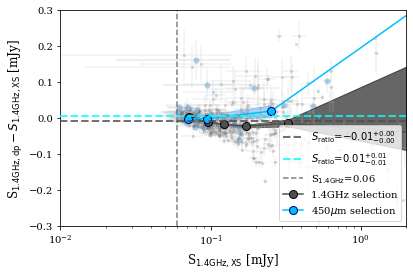

In [665]:
x_arr    = df_1d4GHz_XS_dp['Flux_corr_1d4GHz']*1e3
xerr_arr = df_1d4GHz_XS_dp['Eflux_corr_1d4GHz']*1e3
y_arr    = df_1d4GHz_XS_dp['flux_1d4GHz']-x_arr
yerr_arr = df_1d4GHz_XS_dp['ferr_1d4GHz']

x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
y2_arr    = df_Ugne_lpv1['flux_1d4GHz']-x2_arr 
y2err_arr = df_Ugne_lpv1['ferr_1d4GHz']

lower_threshold = 0.06
# lower_threshold = -np.inf
upper_threshold = np.inf
default_value = np.nan

x_clip_arr, mask_clip= clip_threshold_arr(x_arr, upper_threshold, lower_threshold, default_value, return_mask=True)
xerr_clip_arr = replace_mask(xerr_arr, mask_clip, default_value)
y_clip_arr    = replace_mask(y_arr, mask_clip, default_value)
yerr_clip_arr = replace_mask(yerr_arr, mask_clip, default_value)

# x_clip_arr    = remove_nan(x_clip_arr, return_mask=False)

x2_clip_arr, mask2_clip= clip_threshold_arr(x2_arr, upper_threshold, lower_threshold, default_value, return_mask=True)
x2err_clip_arr = replace_mask(x2err_arr, mask2_clip, default_value)
y2_clip_arr    = replace_mask(y2_arr, mask2_clip, default_value)
y2err_clip_arr = replace_mask(y2err_arr, mask2_clip, default_value)

x_arr = x_clip_arr
y_arr = y_clip_arr
xerr_arr = xerr_clip_arr
yerr_arr = yerr_clip_arr

x2_arr = x2_clip_arr
y2_arr = y2_clip_arr
x2err_arr = x2err_clip_arr
y2err_arr = y2err_clip_arr


fig = plt.figure()
plt.rcParams["font.family"] = "serif"
ax  = fig.add_axes([0.12,0.12,0.8,0.75]) # left, bottom, width, height (range 0 to 1)

ax.errorbar(x_arr, y_arr,
            yerr_arr, yerr_arr, 
            fmt='o', markersize=2, alpha = 0.2,
            color = 'darkgray', markeredgecolor = '#4F4F4F', ecolor ='silver', 
#             label='VLA (1.4GHz)'
#             label='VLA (1.4GHz), #=%d'%(len(x_arr))
            )


try:
    med_arr = y_arr.to_numpy()
except AttributeError:
    med_arr = y_arr
median, median_bs = bootstrap_error(arr=med_arr, number=1000)
bs_low, bs_up     = median_bs[0], median_bs[1]
ax.plot(x_line, x_line*0 + median, 
        linestyle='--', linewidth=2, color = '#4F4F4F', alpha = 0.8, zorder=10,\
        label=r'$S_{\rm ratio}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
       )


ax.errorbar(x2_arr, y2_arr,
            x2err_arr, y2err_arr,
            fmt='o', markersize=5, alpha=0.2,
            color = 'deepskyblue', markeredgecolor = 'navy', ecolor ='lightblue', 
#             label='Ugne (450um) samples',
#             label='Ugne (450um), #=%d'%(len(x2_arr))
           )

try:
    med_arr = y2_arr.to_numpy()
except AttributeError:
    med_arr = y2_arr
median, median_bs = bootstrap_error(arr=med_arr, number=1000)
bs_low, bs_up     = median_bs[0], median_bs[1]
ax.plot(x_line, x_line*0 + median, 
        linestyle='--', linewidth=2, color = 'cyan', alpha = 0.8, zorder=10,\
        label=r'$S_{\rm ratio}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
       )

xbin_m, xbin_std, ybin_m, ybin_std = func_binning(x_arr, y_arr, bin_num=100)
print(xbin_m)
print(xbin_m+xbin_std[:].T)
ax.errorbar(xbin_m[:], ybin_m[:],\
#             xerr=np.abs(xbin_std).T,\
#             yerr=np.abs(ybin_std).T,\
            fmt='o-', color='#4F4F4F', ecolor = 'k', alpha=1.,\
            markersize=8, markeredgecolor='k', markeredgewidth=1, capsize=3,\
            label='1.4GHz selection'
           )
ax.fill_between(xbin_m, \
                ybin_m+ybin_std.T[0], \
                ybin_m+ybin_std.T[1], \
                color='k', alpha=0.6, \
               )


x2bin_m, x2bin_std, y2bin_m, y2bin_std = func_binning(x2_arr, y2_arr, bin_num=9)
ax.errorbar(x2bin_m[:], y2bin_m[:],\
#             xerr=np.abs(x2bin_std.T),\
#             yerr=np.abs(y2bin_std.T),\
            fmt='o-', color = 'deepskyblue', markeredgecolor = 'navy', ecolor ='navy', 
            markersize=8, markeredgewidth=1, capsize=3, alpha=1.,
            label=r'450$\mu$m selection'
           )

ax.fill_between(x2bin_m, \
                y2bin_m+y2bin_std.T[0], \
                y2bin_m+y2bin_std.T[1], \
                color='dodgerblue', alpha=0.4, \
               )

x_line = np.linspace(xlim_low, xlim_up, 20)
# ax.plot(x_line, x_line, '--', color='gray', zorder=10)
ax.plot(x_line, x_line*0+1, '--', color='gray', zorder=2)



xlim_low, xlim_up = 1e-2, 2e0
ax.set_xlim(xlim_low, xlim_up) 
# ax.set_ylim(xlim_low, xlim_up)
 
# xlim_low, xlim_up = 0, 0.4
ylim_low, ylim_up = -0.3, 0.3
# ax.set_xlim(xlim_low, xlim_up) 
ax.set_ylim(ylim_low, ylim_up)

y_line = np.linspace(ylim_low, ylim_up, 20)
# ax.plot(x_line, x_line, '--', color='gray', zorder=10)
ax.plot(y_line*0+lower_threshold, y_line, '--', color='gray', label=r'S$_{\rm 1.4GHz}$=%s'%(lower_threshold), zorder=2)




ax.set_xscale('log')
ax.set_xlabel(r'S$_{\rm 1.4 GHz, XS}$ [mJy]', fontsize=12)
ax.set_ylabel(r'S$_{\rm 1.4 GHz, dp} - S_{\rm 1.4 GHz, XS}$ [mJy]', fontsize=12)
plt.legend(fontsize=10, loc='lower right')
plt.savefig('./test_S_minus.pdf')

In [647]:
x_arr    = df_1d4GHz_XS_dp['Flux_corr_1d4GHz']*1e3
xerr_arr = df_1d4GHz_XS_dp['Eflux_corr_1d4GHz']*1e3
y_arr    = df_1d4GHz_XS_dp['flux_1d4GHz']/x_arr
yerr_arr = df_1d4GHz_XS_dp['ferr_1d4GHz']

x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
y2_arr    = df_Ugne_lpv1['flux_1d4GHz']/x2_arr 
y2err_arr = df_Ugne_lpv1['ferr_1d4GHz']

In [648]:
lower_threshold = 0.06
upper_threshold = np.inf
default_value = np.nan

x_clip_arr, mask_clip= clip_threshold_arr(x_arr, upper_threshold, lower_threshold, default_value, return_mask=True)
xerr_clip_arr = replace_mask(xerr_arr, mask_clip, default_value)
y_clip_arr    = replace_mask(y_arr, mask_clip, default_value)
yerr_clip_arr = replace_mask(yerr_arr, mask_clip, default_value)

# x_clip_arr    = remove_nan(x_clip_arr, return_mask=False)

x2_clip_arr, mask2_clip= clip_threshold_arr(x2_arr, upper_threshold, lower_threshold, default_value, return_mask=True)
x2err_clip_arr = replace_mask(x2err_arr, mask2_clip, default_value)
y2_clip_arr    = replace_mask(y2_arr, mask2_clip, default_value)
y2err_clip_arr = replace_mask(y2err_arr, mask2_clip, default_value)

x_arr = x_clip_arr
y_arr = y_clip_arr
xerr_arr = xerr_clip_arr
yerr_arr = yerr_clip_arr

x2_arr = x2_clip_arr
y2_arr = y2_clip_arr
x2err_arr = x2err_clip_arr
y2err_arr = y2err_clip_arr


In [634]:
np.nanmean(x_arr/y_arr), np.nanstd(x_arr/y_arr)

(0.2845830613721073, 0.7024325690108769)

In [635]:
np.nanmean(x_arr-y_arr), np.nanstd(x_arr-y_arr)

(-0.7122424101767437, 0.7519697571902643)

In [636]:
diff = x_arr-y_arr
# print(np.abs(diff.mean/diff.sdev))
# stat, p = wilcoxon(data1, data2)
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

print("")

Statistics=46.500, p=0.410
Same distribution (fail to reject H0)



In [637]:
t_stat, p = ttest_ind(x_arr, y_arr, nan_policy='omit')
print(f't={t_stat}, p={p}')

t=-22.135256561551067, p=3.851096786512855e-90


In [694]:
def mybootstrap(data, num_samples, statistic, alpha):
        """Returns bootstrap estimate of 100.0*(1-alpha) CI (Confidence Interval) for statistic."""
        n = len(data)
        np.random.seed()
        idx = np.random.randint(0, n, (num_samples, n))
        samples = data[idx]
        stat = np.sort(statistic(samples, 1))
        return (stat[int((alpha/2.0)*num_samples)], stat[int((1.-alpha/2.0)*num_samples)])

def bootstrap_error(arr, number=1000):
    if arr.ndim == 1:
        median = np.nanmedian(arr)
        median_bs = mybootstrap( arr, number, np.nanmedian, 1.-0.683) - np.nanmedian(arr)
    elif arr.ndim == 2:
        median = np.nanmedian(arr, axis=1)
        median_bs = np.zeros((len(arr), 2))
        for i, arr_sub in enumerate(arr):
            median_bs[i][0], median_bs[i][1] = \
            mybootstrap(arr_sub, number, np.nanmedian, 1.-0.683) - median[i]
    return median, median_bs

def func_binning(x_arr, y_arr, bin_num):

    # x_arr = z_arr
    # y_arr = q_IR_IR
    # bins_axis = x
    
    x_arr, y_arr, _, _ = remove_xynan(x_arr, y_arr)
    
    #
    x_add_arr    = np.empty(bin_num - len(x_arr)%bin_num)
    x_add_arr[:] = np.nan
    x_arr        = np.concatenate((x_arr, x_add_arr), axis=None)
    
    y_add_arr    = np.empty(bin_num - len(y_arr)%bin_num)
    y_add_arr[:] = np.nan
    y_arr        = np.concatenate((y_arr, y_add_arr), axis=None)

    # mean binning
    xy_2d_arr      = np.vstack((x_arr, y_arr)).T
    x_ord_y_2d_arr = xy_2d_arr[xy_2d_arr[:,0].argsort()]
    x_ord_x        = x_ord_y_2d_arr.T[0]
    y_ord_x        = x_ord_y_2d_arr.T[1] 

    #bin_num = 10
#     xbin_m   = np.nanmean(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
#     xbin_std = np.nanstd(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
#     ybin_m   = np.nanmean(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
#     ybin_std = np.nanstd(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    xbin = x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num)
    ybin = y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num)
#     print(np.shape(xbin))
#     print(ybin)
    
    xbin_m   = np.nanmedian(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    xbin_std = np.nanstd(x_ord_x[:(len(x_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    ybin_m   = np.nanmedian(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)
    ybin_std = np.nanstd(y_ord_x[:(len(y_ord_x)//bin_num)*bin_num].reshape(-1,bin_num), axis=1)

#     xbin_m, xbin_m_bs = bootstrap_error(arr=xbin[0], number=1000)
#     print(xbin_m, xbin_m_bs, '\n')
    xbin_m, xbin_m_bs = bootstrap_error(arr=xbin, number=1000)
    ybin_m, ybin_m_bs = bootstrap_error(arr=ybin, number=1000)
    xbin_std = np.average(np.abs(xbin_m_bs),axis=1)
    ybin_std = np.average(np.abs(ybin_m_bs),axis=1)
    
#     print('xbin_m', xbin_m)
#     print('xbin_m_bs',xbin_m_bs)
#     print('avg', np.average(np.abs(xbin_m_bs),axis=1))
#     bs_low, bs_up     = median_bs[0], median_bs[1]



#     xbin_m, ybin_m, xbin_std, ybin_std = \
#     remove_xynan(xbin_m, ybin_m, xerrdata=xbin_std, yerrdata=ybin_std)
#     return xbin_m, xbin_std, ybin_m, ybin_std

    xbin_m, ybin_m, xbin_m_bs, ybin_m_bs = \
    remove_xynan(xbin_m, ybin_m, xerrdata=xbin_m_bs, yerrdata=ybin_m_bs)


    return xbin_m, xbin_m_bs, ybin_m, ybin_m_bs

x2bin_m, x2bin_std, y2bin_m, y2bin_std = func_binning(x2_arr, y2_arr, bin_num=12)
print(x2bin_m)
print(x2bin_std)

[0.07367794 0.14164634 0.56047747]
[[-0.00276885  0.00453366]
 [-0.03890766  0.01216555]
 [-0.03308467  2.3896602 ]]


/usr/local/anaconda3/envs/astro37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [703]:
x_arr    = df_1d4GHz_XS_lpv1['Flux_corr_1d4GHz']*1e3
xerr_arr = df_1d4GHz_XS_lpv1['Eflux_corr_1d4GHz']*1e3
y_arr    = df_1d4GHz_XS_lpv1['flux_1d4GHz_lpv1']
yerr_arr = df_1d4GHz_XS_lpv1['ferr_1d4GHz_lpv1']

x2_arr    = df_Ugne_lpv1['Flux_corr_1d4GHz']*1e3
x2err_arr = df_Ugne_lpv1['Eflux_corr_1d4GHz']*1e3
y2_arr    = df_Ugne_lpv1['flux_1d4GHz_lpv1'] 
y2err_arr = df_Ugne_lpv1['ferr_1d4GHz_lpv1']

In [228]:
sample1 =x_arr
sample2 =y_arr
# paired sample -> the difference has mean 0
difference = sample1 - sample2
# the t-value is easily computed with numpy
t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))
# unfortunately, numpy does not have a build in CDF
# here is a ridiculous work-around integrating by sampling
s = np.random.standard_t(len(difference), size=100000)
p = np.sum(s<t) / float(len(s))
print(p)
# using a two-sided test
print("There is a {} % probability that the paired samples stem from distributions with the same means.".format(2 * min(p, 1 - p) * 100))

0.09515
There is a 19.03 % probability that the paired samples stem from distributions with the same means.


In [669]:
# constant parameters
h = 6.6260755e-27           # plank constant (erg s-1)
k = 1.380658e-16            # boltzmann constant (erg k-1)
c = 2.99792458e10           # speed of light in a vacuun (cm s-1)
L_sun = 3.9e33              # solar luminosity (erg s-1)

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
print (cosmo)

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)


In [670]:
def cal_spcetral_index(S1, freq1, S2, freq2):
    return np.divide(np.log(S1)-np.log(S2), np.log(freq1)-np.log(freq2))

def mybootstrap(data, num_samples, statistic, alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI (Confidence Interval) for statistic."""
    n = len(data)
    np.random.seed()
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)], stat[int((1.-alpha/2.0)*num_samples)])

def bootstrap_error(arr, number=1000):
    return np.nanmedian(arr), mybootstrap( arr, number, np.nanmedian, 1.-0.683) - np.nanmedian(arr)

In [671]:
def cal_L_1d4GHz (S_1d4GHz, z, alpha = -0.8):
    
    '''
    Purpose: 
    
      Calculate luminosity at a rest frequency of 1.4 GHz from the observer-frame frequency of 1.4 GH.
    
    
    Input:
    
    - S_1d4GHz [float]: flux density at the observer-frame frequency of 1.4 GHz 
                        (uJy = 1e-6 * 1e-23 * erg s-1 cm-2 Hz-1)
    - z        [float]: redshift (unitless)
    - alpha    [float]: spectral index (unitless)
    
    - D_L      [float]: luminosity distance (cm)
    
    
    Return:
    
    - L_1d4GHz [float]: luminosity at a rest frequency of 1.4 GHz (erg s-1 Hz-1)
    
    '''
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
    try:
        z_m, z_err = MyStatistic.gv2arr(z)
    except AttributeError:
        z_m = z
    u_Mpc2cm     = 3.08567758e24                                   # 1 Mpc in cm unit
    D_L_cm       = cosmo.luminosity_distance(z_m).value * u_Mpc2cm   # luminosity distance (cm)
    S_1d4GHz_uJy = S_1d4GHz                                        # flux density at 1.4 GHz (uJy)
    S_1d4GHz_cgs = S_1d4GHz_uJy * 1e-6 * 1e-23                     # flux density at 1.4 GHz (cgs unit)
    
    # luminosity (cgs unit)
    L_1d4GHz     = np.divide( 4*np.pi * D_L_cm**2 * S_1d4GHz_cgs, np.power(1+z, 1+alpha) )  
    #L_1d4GHz     = 4*np.pi * D_L_cm**2 * S_1d4GHz_cgs * np.power(1+z, alpha -1)
    
    return L_1d4GHz
    
def cal_q_IR(L_FIR, L_1d4GHz):
    '''
    Prupose:
    
      Calculate the far-infrared radio correlation (q_IR)
    
    
    Input:
    
    - L_FIR    [float]: FIR-luminosity (erg s-1 Hz-1)
    - L_1d4GHz [float]: luminosity at a rest-frame frequency of 1.4 GHz (erg s-1 Hz-1)
    
    
    Return:
    
    - q_IR     [float]: far-infrared radio correlation (unitless)
    '''
    #return np.log10(np.divide( L_FIR, 3.75e12)) - np.log10(L_1d4GHz) 
    return np.log10(L_FIR) - np.log10(L_1d4GHz) 

def convert_L_log(L_org, freq_org, freq_fin, alpha):
    L_fin = L_org * np.power(np.divide(freq_fin, freq_org), alpha)
    #L_log_fin = L_log_org + alpha * (np.log10(freq_fin) - np.log10(freq_org))
    return L_fin


def func_cal_FIRRC(z, S_radio_mJy, L_IR, alpha=None):
    '''
    Prupose:
    
      Calculate the far-infrared radio correlation (q_IR) from the catalog
    
    
    Input:
    
    - z           [float]: redshift
    - L_IR        [float]: IR-luminosity (erg s-1 Hz-1)
    - S_radio_mJy [float]: luminosity at a rest-frame frequency of 1.4 GHz (1e-23 * 1e-3 * erg s-1 Hz-1)
    
    
    Return:
    
    - q_IR        [float]: far-infrared radio correlation (unitless)
    '''
    
    if alpha == None:
        # 1.4 GHz detected     
        S_1d4GHz_uJy = S_radio_mJy*1e3        # convert mJy to uJy

    else:
        # 1.4 GHz undetected
        # calculate the 1.4 GHz flux from 3 GHz flux
        S_3GHz_uJy   = S_radio_mJy*1e3        # convert mJy to uJy
        S_1d4GHz_uJy = convert_L_log(S_3GHz_uJy, 3, 1.4, alpha)
        
  
    # calculate the luminosity at a rest frequency of 1.4 GHz
    L_1d4GHz_cgs = cal_L_1d4GHz(S_1d4GHz_uJy, z)
    L_1d4GHz_log10 = np.log(L_1d4GHz_cgs/L_sun)/np.log(10)
    # calculate the q_IR
    L_IR_log10  = L_IR
    L_IR_cgs    = np.divide(10**(L_IR_log10), 3.75e12)*L_sun
    q_IR         = np.log(L_IR_cgs)/np.log(10) - np.log(L_1d4GHz_cgs)/np.log(10) 
#     q_IR         = cal_q_IR(L_IR_cgs, L_1d4GHz_cgs)
    
    return q_IR, L_1d4GHz_log10

#### 850um

In [773]:
# df_850um_Ugne   = pd.read_csv('%sAS2UDS_match_r1d6arcs_detected_1d4GHz.csv'%(PATH_DATA))

def lum_limit_sample(df_in):
    df = df_in.copy()
    df = df.drop(df[df.z_m < 1.5].index)
    df = df.drop(df[df.z_m > 4.0].index)
#     df = df.drop(df[df.z_m > 4.0].index)
    return df

df_850um_Ugne = lum_limit_sample(df_850um_Ugne)


S_1d4GHz_850     = df_850um_Ugne['Flux'].to_numpy()/1e3 # mJy
S_1d4GHz_err_850 = df_850um_Ugne['Flux_err']/1e3 # mJy
S_1d4GHz_850_gv  = gv.gvar(S_1d4GHz_850,   S_1d4GHz_err_850)
z_850            = df_850um_Ugne['z_m'].to_numpy()
z_err_850        = 0.5*(df_850um_Ugne['z_16'].to_numpy() + 
                        df_850um_Ugne['z_84'].to_numpy() - 
                        2*z_850)  
z_850_gv        = gv.gvar(z_850,     z_err_850)
L_IR_850         = df_850um_Ugne['Ldust_m'].to_numpy()      # [Lsun]
L_IR_err_850     = 0.5*(df_850um_Ugne['Ldust_16'].to_numpy() + 
                        df_850um_Ugne['Ldust_84'].to_numpy() - 
                        2*L_IR_850)
L_IR_850_gv  = gv.gvar(L_IR_850,     L_IR_err_850)
q_IR_850_gv, L_1d4GHz_log10_850_gv  = func_cal_FIRRC(z_850_gv, S_1d4GHz_850_gv, L_IR_850_gv, alpha=None)
q_IR_850, q_IR_err_850 = MyStatistic.gv2arr(q_IR_850_gv)
L_1d4GHz_log10_850, L_1d4GHz_log10_err_850 = MyStatistic.gv2arr(L_1d4GHz_log10_850_gv)

q_IR_850[q_IR_850<1.55] = np.nan

In [738]:
df_450um_Gao

,Unnamed: 0,ID_STUDIES_Gao,RA_450Gao,Dec_450Gao,x_450,y_450,S450_raw,S450_corr,S450_err,SNR_450,...,qIR_3lp1d4XS_Lim,qIR_3lp1d4XS_Lim_err,is_radio_AGNs_3lp1d4XS_Lim,alpha_3lp_1d4dp,alpha_3lp_1d4dp_err,L_1d4GHz_log10_3lp_1d4dp,L_1d4GHz_log10_3lp_1d4dp_err,qIR_3lp1d4dp_Lim,qIR_3lp1d4dp_Lim_err,is_radio_AGNs_3lp1d4dp_Lim
0,0,1,150.139038,2.433333,1186,1280,29.612616,28.713087,0.651312,45.466087,...,2.263253,0.108297,False,-0.800000,0.000000,-2.027436,0.038798,2.493405,0.063287,False
1,1,2,150.163503,2.372500,1098,1061,30.387997,29.796791,0.861907,35.256707,...,2.269797,0.059825,False,-0.750292,0.161509,-2.129569,0.089784,2.285538,0.094663,False
2,2,3,150.098725,2.365555,1331,1036,23.406271,22.817402,0.816971,28.650056,...,2.707072,0.210186,False,-1.347302,0.393034,-1.377289,0.313206,1.953258,0.317172,False
3,3,4,150.143207,2.356111,1171,1002,21.652877,21.316823,0.825594,26.227012,...,1.116226,0.041279,True,-1.012385,0.088019,-1.704873,0.040269,1.050842,0.050216,True
4,4,5,150.119853,2.533889,1255,1642,32.558999,31.720827,1.275093,25.534601,...,2.177413,0.106743,False,-0.769215,0.222556,-1.509014,0.181949,2.254982,0.188694,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,467,467,150.221327,2.325553,890,892,8.120222,6.092308,2.317148,3.504404,...,NaN,NaN,False,-0.800000,0.000000,NaN,NaN,NaN,NaN,False
468,468,468,150.051744,2.306387,1500,823,5.810075,4.504241,1.658105,3.504046,...,NaN,NaN,False,-0.800000,0.000000,NaN,NaN,NaN,NaN,False
469,469,469,150.081204,2.540832,1394,1667,5.804976,4.498744,1.657561,3.502119,...,NaN,NaN,False,-0.800000,0.000000,NaN,NaN,NaN,NaN,False
470,470,470,150.095945,2.364722,1341,1033,2.939532,2.464828,0.839514,3.501470,...,NaN,NaN,False,-0.800000,0.000000,NaN,NaN,NaN,NaN,False


In [774]:
S_1d4GHZ_DET_LIMIT      = 5*1.8e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10
# S_1d4GHZ_DET_LIMIT      = 4*12e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10

sample = 'Ugne'
# sample = 'Lim'
# sample = 'Gao'
snr_thld_Gao = 4
# SNR, AGN, None
# branch = 'SNR' 
# branch = 'AGN'
branch = 'All'
thld_S1d4GHzDet = 0
# thld_S1d4GHzDet = 3
# thld_S1d4GHzDet = 6
# y_axis = 'alpha'
y_axis = 'qIR'
# vla1d4GHz = 'dp'
vla1d4GHz = 'XS'
is_compare850 = True
remove_qIR_lt1d55 = True

fn_savefig = 'cosmos_450um_%s_1d4GHz%s_%s_slt%s'%(y_axis, vla1d4GHz, sample, branch)
if thld_S1d4GHzDet > 0:
    fn_savefig += '_S1d4GHzthld%dsnr'%(thld_S1d4GHzDet)

    
S_3GHZ_DET_LIMIT        = 5*2.3e-3      # 5 sigma detection limit (mJy/beam), from Smolčić+17
if vla1d4GHz == 'XS':
    S_1d4GHZ_DET_LIMIT      = 5*1.8e-3      # 5 sigma detection limit (mJy/beam), from Hiddo+21
elif vla1d4GHz == 'dp':
    S_1d4GHZ_DET_LIMIT      = 4*12e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10    
    
if sample == 'Gao':
    df_450um = df_450um_Gao
    snr_thld = snr_thld_Gao
elif sample == 'Lim':
    df_450um = df_450um_Lim
elif sample == 'Ugne':
    df_450um = df_450um_Ugne
    
if branch == 'SNR':
    snr_thld_lst = [3.5, 4, 5]
    label_lst = ['SNR>3.5', 'SNR>4', 'SNR>5']
    marker_lst = ['o']*3
    mcolor = ['darkviolet', 'navy', '#4F4F4F']
    ecolor = ['violet', 'lightblue', 'silver']
    color  = ['violet', 'royalblue', 'darkgray']
elif branch == 'AGN':
    snr_thld = 5
    column_AGN_lst = [None, 'nAGN', 'XrayAGN_3GHz_multiAGN', 'MIRAGN_3GHz_multiAGN', 'SEDAGN_3GHz_multiAGN', 'RExcess_3GHz_multiAGN']
    label_lst = ['All', 'nAGN', 'XrayAGN', 'MIRAGN', 'SEDAGN', 'RExcess']
    marker_lst = ['o', 'o', 's', 'v', '^', 'D']
    mcolor = ['#4F4F4F', '#4F4F4F', 'darkviolet',  'C1', 'navy', 'C3' ]
    ecolor = ['silver', 'silver', 'violet',  'C1', 'lightblue',  'lightcoral' ]
    color  = ['darkgray', 'darkgray', 'violet',  'C1', 'royalblue',   'salmon' ]
elif branch == 'All':
    label_lst = ['%s(450um)'%(sample)]
    marker_lst = ['o']
    mcolor = ['#4F4F4F']
    ecolor = ['silver']
    color  = ['darkgray']

#----
x_lst, xerr_lst, y_lst, yerr_lst = [], [], [], []
x2_lst, x2err_lst, x3_lst, x3err_lst = [], [], [], []
for i, label in enumerate(label_lst):
    if branch == 'SNR':
#         if sample != 'Gao':
#             print('Only Gao catalog can plot with different SNR. Please check your input parameters')
#             break
#         else:
        snr_thld = snr_thld_lst[i]
        if sample == 'Gao':
            slt_snr   = df_450um['SNR_450']>snr_thld
        else:
            slt_snr   = df_450um['SCUBA2_450_flux']/df_450um['SCUBA2_450_fluxerr']>snr_thld
        slt_crit = slt_snr
    elif branch == 'AGN':             
        column_AGN = column_AGN_lst[i]        
        if column_AGN is None: # all sample
            slt_crit = [True]*df_450um.shape[0]
        elif column_AGN == 'nAGN': # non-AGN sample
            slt_agn   = ~(df_450um[column_AGN_lst[2]] == True) &\
                        ~(df_450um[column_AGN_lst[3]] == True) &\
                        ~(df_450um[column_AGN_lst[4]] == True) &\
                        ~(df_450um[column_AGN_lst[5]] == True) 
            slt_crit = slt_agn
        else: # each AGN sample
            slt_agn   = df_450um[column_AGN] == True
            slt_crit  = slt_agn
        if sample == 'Gao':
            slt_snr   = df_450um['SNR_450']>snr_thld
            slt_crit = slt_crit & slt_snr
    elif branch == 'All':
        slt_crit = [True]*df_450um.shape[0]

        
    if thld_S1d4GHzDet > 0:
        if vla1d4GHz == 'XS':
            slt_thld = df_450um['Flux_corr_1d4GHz']*1e3>S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet
        elif vla1d4GHz == 'dp':
            slt_thld = df_450um['flux_1d4GHz']>S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet
        slt_crit = slt_crit & slt_thld
        
    if remove_qIR_lt1d55:
        if sample == 'Ugne':
            if vla1d4GHz == 'XS':
                slt_rmqIR_lt1d55 = df_450um['qIR_3lp1d4XS_Ugne']>1.55
            elif vla1d4GHz == 'dp':
                slt_rmqIR_lt1d55 = df_450um['qIR_3lp1d4dp_Ugne']>1.55
            slt_rmz_ht4 = df_450um['z_m_Ugne']<4
        else:
            if vla1d4GHz == 'XS':
                slt_rmqIR_lt1d55 = df_450um['qIR_3lp1d4XS_Lim']>1.55
            elif vla1d4GHz == 'dp':
                slt_rmqIR_lt1d55 = df_450um['qIR_3lp1d4dp_Lim']>1.55
            slt_rmz_ht4 = df_450um['redshift']<4
            
        slt_crit = slt_crit & slt_rmqIR_lt1d55 & slt_rmz_ht4

    S_1d4GHz        = df_450um[slt_crit]['Flux_corr_1d4GHz']*1e3  # Jy -> mJy
    S_1d4GHz_err    = df_450um[slt_crit]['Eflux_corr_1d4GHz']*1e3 # Jy -> mJy
    S_1d4GHz_dp     = df_450um[slt_crit]['flux_1d4GHz'] # mJy
    S_1d4GHz_dp_err = df_450um[slt_crit]['ferr_1d4GHz'] # mJy        
    S_3GHz          = df_450um[slt_crit]['flux_3GHz']/1e3     # uJy -> mJy
    S_3GHz_err      = df_450um[slt_crit]['flux_err_3GHz']/1e3 # uJy -> mJy    

    L1d4_log10         = df_450um[slt_crit]['L_1d4GHz_log10_3lp_1d4XS']
    L1d4_log10_err     = df_450um[slt_crit]['L_1d4GHz_log10_3lp_1d4XS_err']
    L1d4_log10_dp      = df_450um[slt_crit]['L_1d4GHz_log10_3lp_1d4dp']
    L1d4_log10_dp_err  = df_450um[slt_crit]['L_1d4GHz_log10_3lp_1d4dp_err']   
    
    alpha           = df_450um[slt_crit]['alpha_3lp_1d4XS'] # mJy
    alpha_err       = df_450um[slt_crit]['alpha_3lp_1d4XS_err'] # mJy
    alpha_dp        = df_450um[slt_crit]['alpha_3lp_1d4dp'] # mJy
    alpha_dp_err    = df_450um[slt_crit]['alpha_3lp_1d4dp_err'] # mJy    

    z_Lim           = df_450um[slt_crit]['redshift'] # mJy
    z_Lim_err       = df_450um[slt_crit]['redshift_err'] # mJy

    qIR_Lim             = df_450um[slt_crit]['qIR_3lp1d4XS_Lim'] # mJy
    qIR_Lim_err         = df_450um[slt_crit]['qIR_3lp1d4XS_Lim_err'] # mJy
    qIR_Lim_dp             = df_450um[slt_crit]['qIR_3lp1d4dp_Lim'] # mJy
    qIR_Lim_dp_err         = df_450um[slt_crit]['qIR_3lp1d4dp_Lim_err'] # mJy

    if sample == 'Ugne':
        z_Ugne          = df_450um[slt_crit]['z_m_Ugne'] # mJy
        z_Ugne_err      = df_450um[slt_crit]['redshift_err'] # mJy    
        qIR_Ugne             = df_450um[slt_crit]['qIR_3lp1d4XS_Ugne'] # mJy
        qIR_Ugne_err         = df_450um[slt_crit]['qIR_3lp1d4XS_Ugne_err'] # mJy
        qIR_Ugne_dp             = df_450um[slt_crit]['qIR_3lp1d4dp_Ugne'] # mJy
        qIR_Ugne_dp_err         = df_450um[slt_crit]['qIR_3lp1d4dp_Ugne_err'] # mJy
        

    # x-axis: 1.4 GHz
    if vla1d4GHz == 'XS':
        x_lst.append(S_1d4GHz)
        xerr_lst.append(S_1d4GHz_err)
    elif vla1d4GHz == 'dp':
        x_lst.append(S_1d4GHz_dp)
        xerr_lst.append(S_1d4GHz_dp_err)
    # x-axis: 3 GHz
    x2_lst.append(S_3GHz)
    x2err_lst.append(S_3GHz_err)
    # x-axis: redshift
    if sample == 'Ugne':
        x3_lst.append(z_Ugne)
        x3err_lst.append(z_Ugne_err)
    elif sample == 'Lim':
        x3_lst.append(z_Lim)
        x3err_lst.append(z_Lim_err)   
    # y-axis: alpha
    if y_axis == 'alpha':
        if vla1d4GHz == 'XS':
            y_lst.append(alpha)
            yerr_lst.append(alpha_err)
        elif vla1d4GHz == 'dp':
            y_lst.append(alpha)
            yerr_lst.append(alpha_err)
    # y-axis: qIR
    elif y_axis == 'qIR':
        if sample == 'Ugne':
            if vla1d4GHz == 'XS':
                y_lst.append(qIR_Ugne)
                yerr_lst.append(qIR_Ugne_err)
            elif vla1d4GHz == 'dp':
                y_lst.append(qIR_Ugne_dp)
                yerr_lst.append(qIR_Ugne_dp_err)
        elif sample == 'Lim':
            if vla1d4GHz == 'XS':
                y_lst.append(qIR_Lim)
                yerr_lst.append(qIR_Lim_err)
            elif vla1d4GHz == 'dp':
                y_lst.append(qIR_Lim_dp)
                yerr_lst.append(qIR_Lim_dp_err)
    
if plot_freq == '1d4GHz':
    x_arr = x_lst
    xerr_arr = xerr_lst
elif plot_freq == '3GHz':
    x_arr = x2_lst
    xerr_arr = x2err_lst
elif plot_freq == 'redshift':
    x_arr = x3_lst
    xerr_arr = x3err_lst
y_arr    = y_lst
yerr_arr = yerr_lst

[[-0.002054  -0.000547  -0.002355  -0.000861  -0.0027785 -0.010723 ]
 [ 0.0012085  0.0007505  0.0004415  0.0014135  0.005228   0.024972 ]]
[[-0.02597111 -0.05268935 -0.00536615 -0.01570922 -0.03124567 -0.08825945]
 [ 0.02549727  0.03483217  0.0266309   0.03369598  0.04629937  0.05990838]]
[[0.002054  0.000547  0.002355  0.000861  0.0027785 0.010723 ]
 [0.0012085 0.0007505 0.0004415 0.0014135 0.005228  0.024972 ]]
[[0.02597111 0.05268935 0.00536615 0.01570922 0.03124567 0.08825945]
 [0.02549727 0.03483217 0.0266309  0.03369598 0.04629937 0.05990838]]


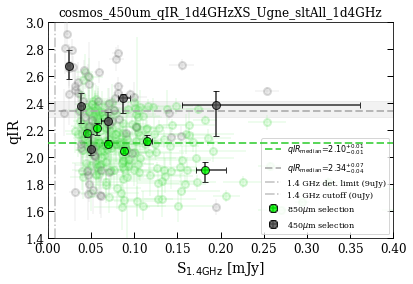

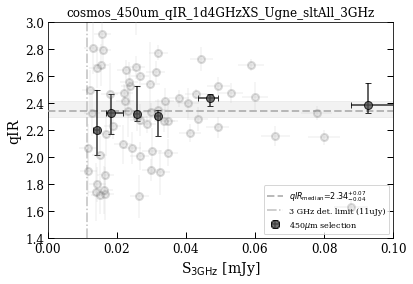

[[-0.025 -0.015 -0.015 -0.03  -0.02  -0.02 ]
 [ 0.005  0.035  0.075  0.03   0.025  0.1  ]]
[[-0.02905801 -0.02971974 -0.02124405 -0.02663685 -0.00568462 -0.01593648]
 [ 0.03118438  0.06729161  0.00848877  0.04973235  0.08143475  0.03690729]]
[[0.025 0.015 0.015 0.03  0.02  0.02 ]
 [0.005 0.035 0.075 0.03  0.025 0.1  ]]
[[0.02905801 0.02971974 0.02124405 0.02663685 0.00568462 0.01593648]
 [0.03118438 0.06729161 0.00848877 0.04973235 0.08143475 0.03690729]]


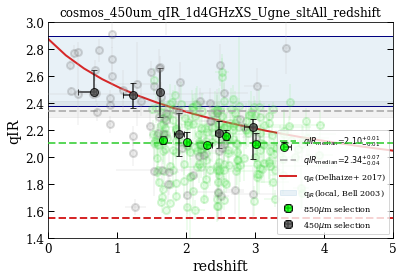

In [781]:
# plot_freq = '1d4GHz'
# plot_freq = '3GHz'

for plot_freq in ['1d4GHz', '3GHz', 'redshift']:

    if plot_freq == '1d4GHz':
        x_arr = x_lst
        xerr_arr = xerr_lst
        xlim_low, xlim_up = 0, 0.4
    elif plot_freq == '3GHz':
        x_arr = x2_lst
        xerr_arr = x2err_lst
        xlim_low, xlim_up = 0, 0.1
    elif plot_freq == 'redshift':
        x_arr = x3_lst
        xerr_arr = x3err_lst
        xlim_low, xlim_up = 0, 5


    y_arr = y_lst
    yerr_arr = yerr_lst

    fig = plt.figure()
    plt.rcParams["font.family"] = "serif"
    ax  = fig.add_axes([0.12,0.12,0.8,0.75]) # left, bottom, width, height (range 0 to 1)

    if y_axis == 'alpha':
        ylim_low, ylim_up = -4, 3
        ax.set_ylabel(r'spectral index $\alpha$', fontsize=14)
    elif y_axis == 'qIR':
        ylim_low, ylim_up = 1.4, 3
        ax.set_ylabel('qIR', fontsize=14)
    
    if is_compare850 and y_axis != 'alpha':
        is_plot_compare850 = True
        if plot_freq == '1d4GHz':
            x_850_arr = S_1d4GHz_850
            xerr_850_arr = S_1d4GHz_err_850
        elif plot_freq == '3GHz':
            is_plot_compare850 = False
        elif plot_freq == 'redshift':
            x_850_arr = z_850
            xerr_850_arr = z_err_850
        y_850_arr = q_IR_850
        yerr_850_arr = q_IR_err_850
        
        if is_plot_compare850:
            ax.errorbar(x_850_arr, y_850_arr, 
                        xerr=xerr_850_arr, 
                        yerr=yerr_850_arr,
                        fmt='o', color='palegreen', ecolor ='lightgreen', alpha=0.2, #zorder = 20,
                        markersize=7, markeredgecolor='limegreen', markeredgewidth=2,
#                         label=r'850$\mu$m selection (#=%d)'%(np.shape(y_850_arr)[0])
#                         label='Ugne (850 um) (#=%d)'%(np.shape(y_850_arr)[0])
                        )
            x_line = np.linspace(xlim_low, xlim_up, 100)
            try:
                med_arr = y_850_arr.to_numpy()
            except AttributeError:
                med_arr = y_850_arr
            median, median_bs = bootstrap_error(arr=med_arr, number=1000)
            bs_low, bs_up     = median_bs[0], median_bs[1]
            ax.plot(x_line, x_line*0 + median, 
                    linestyle='--', linewidth=2, color = 'limegreen', alpha = 0.8, zorder=10,\
                    label=r'$qIR_{\rm median}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
                   )
            
            xbin_m, xbin_std, ybin_m, ybin_std = func_binning(x_850_arr, y_850_arr, bin_num=40)
#             print(xbin_std)
#             print(ybin_std)
            print((xbin_std).T)
            print((ybin_std).T)
            xbin_std = np.nan_to_num(xbin_std)
            ybin_std = np.nan_to_num(ybin_std)
#             print(xbin_std)
#             print(ybin_std)
            print(np.abs(xbin_std).T)
            print(np.abs(ybin_std).T)
            ax.errorbar(xbin_m, ybin_m,\
                        xerr=np.abs(xbin_std).T,\
                        yerr=np.abs(ybin_std).T,\
                        fmt='o', color='lime', ecolor = 'k', alpha=0.8,\
                        markersize=8, markeredgecolor='k', markeredgewidth=1, capsize=3,\
                        label=r'850$\mu$m selection', 
                        zorder=20
                       )
#             ax.fill_between(xbin_m, \
#                             ybin_m+ybin_std.T[0], \
#                             ybin_m+ybin_std.T[1], \
#                             color='green', alpha=0.6, \
#                             zorder=15
#                            )


    for i in range(len(x_arr)): 
        y_arr[i] = np.where(yerr_arr[i]==0, np.nan,
                            np.where(x_arr[i].notna(), y_arr[i], np.nan))

#         if y_axis == 'qIR':
#             lower_threshold = 1.55
#             upper_threshold = np.inf
#             default_value = np.nan

#             y_clip_arr, mask_clip= clip_threshold_arr(y_arr[i], upper_threshold, lower_threshold, default_value, return_mask=True)
#             x_clip_arr    = replace_mask(y_arr[i], mask_clip, default_value)
#             xerr_clip_arr = replace_mask(xerr_arr[i], mask_clip, default_value)   
#             yerr_clip_arr = replace_mask(yerr_arr[i], mask_clip, default_value)

#             print(y_clip_arr)
#             print(mask)

#             x_arr[i] = x_clip_arr
#             y_arr[i] = y_clip_arr
#             xerr_arr[i] = xerr_clip_arr
#             yerr_arr[i] = yerr_clip_arr
            
        ax.errorbar(x_arr[i], y_arr[i], 
                    xerr=xerr_arr[i], 
                    yerr=yerr_arr[i], 
                    fmt=marker_lst[i], color=color[i], ecolor =ecolor[i], alpha=0.2, zorder = 20,
                    markersize=7, markeredgecolor=mcolor[i], markeredgewidth=2,
#                     label='%s (#=%d)'%(label_lst[i], len(y_arr[i])-np.isnan(y_arr[i]).sum())
#                     label=r'450$\mu$m selection (#=%d)'%(len(y_arr[i])-np.isnan(y_arr[i]).sum())
                   )

        x_line = np.linspace(xlim_low, xlim_up, 100)
        try:
            med_arr = y_arr[i].to_numpy()
        except AttributeError:
            med_arr = y_arr[i]
        median, median_bs = bootstrap_error(arr=med_arr, number=1000)
        bs_low, bs_up     = median_bs[0], median_bs[1]
        ax.plot(x_line, x_line*0 + median, 
                linestyle='--', linewidth=2, color = color[i], alpha = 0.8, zorder=10,\
                label=r'$%s_{\rm median}$=$%.2f^{+%.2f}_{%.2f}$'%(y_axis, median, bs_up, bs_low),\
               )
        ax.fill_between(x_line, median + bs_up, median + bs_low, color=ecolor[i], alpha=0.2)

        xbin_m, xbin_std, ybin_m, ybin_std = func_binning(x_arr[i], y_arr[i], bin_num=12)
        xbin_std = np.nan_to_num(xbin_std)
        ybin_std = np.nan_to_num(ybin_std)
        ax.errorbar(xbin_m, ybin_m,\
                    xerr=np.abs(xbin_std).T,\
                    yerr=np.abs(ybin_std).T,\
                    fmt='o', color='#4F4F4F', ecolor = 'k', alpha=0.8,\
                    markersize=8, markeredgecolor='k', markeredgewidth=1, capsize=3,\
                    label=r'450$\mu$m selection', 
                    zorder=20
                   )
#         ax.fill_between(xbin_m, \
#                         ybin_m+ybin_std.T[0], \
#                         ybin_m+ybin_std.T[1], \
#                         color='#4F4F4F', alpha=0.6, \
#                         zorder=15
#                        )
        
    if plot_freq == '1d4GHz':
        ax.set_xlabel(r'S$_{\rm 1.4 GHz}$ [mJy]', fontsize=14)
        if y_axis == 'alpha':
            # plot the 3 GHz detection limit
            S_1d4GHz_line = x_line
            alpha_limit = cal_spcetral_index(S_3GHZ_DET_LIMIT, 3, S_1d4GHz_line, 1.4)
            ax.plot(x_line, alpha_limit, color='C3',
                   label='3 GHz det. limit (%duJy)'%(S_3GHZ_DET_LIMIT*1e3)
                   )

        # plot the 1.4 GHz threshold
        y_plot_arr = np.linspace(ylim_low, ylim_up, 50)   
        ax.plot(y_plot_arr*0+S_1d4GHZ_DET_LIMIT, y_plot_arr, color='silver', linestyle='-.', 
                label=r'1.4 GHz det. limit (%duJy)'%(S_1d4GHZ_DET_LIMIT*1e3)
               )

        # plot the 1.4 GHz cutoff
        ax.plot(y_plot_arr*0+S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet, y_plot_arr, color='silver', linestyle='-.', 
                label=r'1.4 GHz cutoff (%duJy)'%(S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet*1e3)
               )
        
    elif plot_freq == '3GHz':
        ax.set_xlabel(r'S$_{\rm 3 GHz}$ [mJy]', fontsize=14)
        
        if y_axis == 'alpha':
            # plot the 1.4 GHz detection limit
            S_3GHz_line = x_line
            alpha_limit = cal_spcetral_index(S_3GHz_line, 3, S_1d4GHZ_DET_LIMIT, 1.4)
            ax.plot(x_line, alpha_limit, color='C3',
                   label='1.4 GHz det. limit (%duJy)'%(S_1d4GHZ_DET_LIMIT*1e3)
                   )

        # plot the 3 GHz threshold
        y_plot_arr = np.linspace(ylim_low, ylim_up, 50)   
        ax.plot(y_plot_arr*0+S_3GHZ_DET_LIMIT, y_plot_arr, color='silver', linestyle='-.', 
                label=r'3 GHz det. limit (%duJy)'%(S_3GHZ_DET_LIMIT*1e3)
               )
        
    elif plot_freq == 'redshift':
        ax.set_xlabel('redshift', fontsize=14)
        
        if y_axis == 'qIR':
            # Local value
            x = np.linspace(xlim_low, xlim_up, 20)
            y1_Bell_03 = x*0 + 2.64 + 0.26
            y2_Bell_03 = x*0 + 2.64 - 0.26
            ax.plot(x, y1_Bell_03, '-', color='navy', linewidth=1)
            ax.plot(x, y2_Bell_03, '-', color='navy', linewidth=1)
            ax.fill_between(x, y1_Bell_03, y2_Bell_03, color='tab:blue', alpha=0.1, \
                            label = r'q$_{IR}$(local, Bell 2003)',\
                           )
            
            qIR_Del = 2.88*np.power(1+x, -0.19)
            ax.plot(x, qIR_Del, '-', color='tab:red', linewidth=2,\
                   label = r'q$_{IR}$(Delhaize+ 2017)')
            
            
            ax.plot(x, x*0+1.55, '--', color='tab:red', linewidth=2)
            


    ax.set_title('%s_%s'%(fn_savefig, plot_freq))
    ax.set_xlim(xlim_low, xlim_up)
    ax.set_ylim(ylim_low, ylim_up)
    # ax.set_ylim(-4, 0.5)
    ax.tick_params(which='major', direction='in', length=6, width=1, labelsize=12, top=False, right=True)
    ax.tick_params(which='minor', direction='in', length=4, width=1, labelsize=12, top=False, right=True)
    plt.legend(fontsize=8, loc='lower right')
    plt.savefig('%s%s_%s.pdf'%(PATH_FIGURE, fn_savefig, plot_freq))    
    plt.show()

In [339]:
S_1d4GHz_850     = df_850um_Ugne['Flux'].to_numpy()/1e3 # mJy
S_1d4GHz_err_850 = df_850um_Ugne['Flux_err']/1e3 # mJy
S_1d4GHz_850_gv  = gv.gvar(S_1d4GHz_850,   S_1d4GHz_err_850)
z_850            = df_850um_Ugne['z_m'].to_numpy()
z_err_850        = 0.5*(df_850um_Ugne['z_16'].to_numpy() + 
                        df_850um_Ugne['z_84'].to_numpy() - 
                        2*z_850)  
z_850_gv        = gv.gvar(z_850,     z_err_850)
L_IR_850         = df_850um_Ugne['Ldust_m'].to_numpy()      # [Lsun]
L_IR_err_850     = 0.5*(df_850um_Ugne['Ldust_16'].to_numpy() + 
                        df_850um_Ugne['Ldust_84'].to_numpy() - 
                        2*L_IR_850)
L_IR_850_gv  = gv.gvar(L_IR_850,     L_IR_err_850)
    

q_IR_850_gv  = func_cal_FIRRC(z_850_gv, S_1d4GHz_850_gv, L_IR_850_gv, alpha=None)
q_IR_850, q_IR_err_850 = MyStatistic.gv2arr(q_IR_850_gv)

In [359]:
snr_thld = 5
thld_S1d4GHzDet = 6
fn_savefig = '%scosmos_450um_qIR_sltAGN_S1d4GHzthld%dsnr'%(PATH_FIGURE, thld_S1d4GHzDet)

column_AGN_lst = [None, 'nAGN', 'XrayAGN_3GHz_multiAGN', 'MIRAGN_3GHz_multiAGN', 'SEDAGN_3GHz_multiAGN', 'RExcess_3GHz_multiAGN']
label = ['All', 'nAGN', 'XrayAGN', 'MIRAGN', 'SEDAGN', 'RExcess']
mcolor = ['#4F4F4F', '#4F4F4F', 'darkviolet',  'C1', 'navy', 'C3' ]
ecolor = ['silver', 'silver', 'violet',  'C1', 'lightblue',  'lightcoral' ]
color  = ['darkgray', 'darkgray', 'violet',  'C1', 'royalblue',   'salmon' ]
fn_savefig = '%scosmos_450um_qIR_sltAGN_S1d4GHzthld%dsnr'%(PATH_FIGURE, thld_S1d4GHzDet)

x_lst, xerr_lst, y_lst, yerr_lst = [], [], [], []
x2_lst, x2err_lst = [], []
for column_AGN in column_AGN_lst:
    slt_snr   = df_450um_Gao['SNR_450']>snr_thld
    slt_thld = df_450um_Gao['Flux_corr_1d4GHz']*1e3>S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet
    if column_AGN is None:
        slt_crit = slt_snr & slt_thld
    elif column_AGN == 'nAGN':
        slt_agn   = ~(df_450um_Gao[column_AGN_lst[2]] == True) &\
                    ~(df_450um_Gao[column_AGN_lst[3]] == True) &\
                    ~(df_450um_Gao[column_AGN_lst[4]] == True) &\
                    ~(df_450um_Gao[column_AGN_lst[5]] == True) 
        slt_crit = slt_snr & slt_agn & slt_thld
    else:
        slt_agn   = df_450um_Gao[column_AGN] == True
        slt_crit = slt_snr & slt_agn & slt_thld
    # slt_det1d4_3 = df_450um_Gao['flux_3GHz'].notna() & df_450um_Gao['Flux_corr_1d4GHz'].notna()
    S_1d4GHz_Gao     = df_450um_Gao[slt_crit]['Flux_corr_1d4GHz']*1e3 # mJy
    S_1d4GHz_err_Gao = df_450um_Gao[slt_crit]['Eflux_corr_1d4GHz']*1e3 # mJy
    S_3GHz_Gao       = df_450um_Gao[slt_crit]['flux_3GHz']/1e3 # mJy
    S_3GHz_err_Gao   = df_450um_Gao[slt_crit]['flux_err_3GHz']/1e3 # mJy
    qIR_Gao        = df_450um_Gao[slt_crit]['q_IR'] # mJy
    qIR_err_Gao    = df_450um_Gao[slt_crit]['q_IR_err'] # mJy

    x_lst.append(S_1d4GHz_Gao)
    xerr_lst.append(S_1d4GHz_err_Gao)
    x2_lst.append(S_3GHz_Gao)
    x2err_lst.append(S_3GHz_err_Gao)
    y_lst.append(qIR_Gao)
    yerr_lst.append(qIR_err_Gao)
    

if plot_freq == '1d4GHz':
    x_arr = x_lst
    xerr_arr = xerr_lst
elif plot_freq == '3GHz':
    x_arr = x2_lst
    xerr_arr = x2err_lst
y_arr    = y_lst
yerr_arr = yerr_lst

(0.0, 0.4)

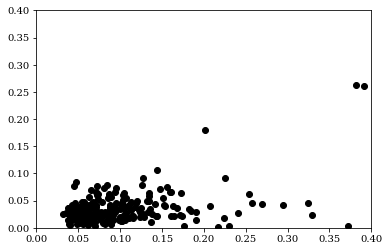

In [383]:
S_radio_mJy = S_1d4GHz_850
z = z_850
alpha=-0.8

S_1d4GHz_uJy = S_radio_mJy*1e3    
# calculate the luminosity at a rest frequency of 1.4 GHz
L_1d4GHz_cgs = cal_L_1d4GHz(S_1d4GHz_uJy, z)

plt.plot(S_radio_mJy, L_1d4GHz_cgs/1e33, 'ko')
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)

In [456]:
# sample = 'Gao5SNR_diffAGN'
# sample = 'Gao_diffSNR'
sample = 'Gao'
# sample = 'Gao_thld'
is_compare850 = True
    
if sample == 'Gao5SNR_diffAGN':
    snr_thld = 5
    column_AGN_lst = [None, 'nAGN', 'XrayAGN_3GHz_multiAGN', 'MIRAGN_3GHz_multiAGN', 'SEDAGN_3GHz_multiAGN', 'RExcess_3GHz_multiAGN']
    label_lst = ['All', 'nAGN', 'XrayAGN', 'MIRAGN', 'SEDAGN', 'RExcess']
    marker_lst = ['o', 'o', 's', 'v', '^', 'D']
    mcolor = ['#4F4F4F', '#4F4F4F', 'darkviolet',  'C1', 'navy', 'C3' ]
    ecolor = ['silver', 'silver', 'violet',  'C1', 'lightblue',  'lightcoral' ]
    color  = ['darkgray', 'darkgray', 'violet',  'C1', 'royalblue',   'salmon' ]
    fn_savefig = '%scosmos_450um_qIR_sltAGN'%(PATH_FIGURE)
elif sample == 'Gao_diffSNR':
    snr_thld_lst = [3.5, 4, 5]
    label_lst = ['SNR>3.5', 'SNR>4', 'SNR>5']
    marker_lst = ['o']*3
    mcolor = ['darkviolet', 'navy', '#4F4F4F']
    ecolor = ['violet', 'lightblue', 'silver']
    color  = ['violet', 'royalblue', 'darkgray']
    fn_savefig = '%scosmos_450um_qIR_sltSNR'%(PATH_FIGURE)
elif sample == 'Gao':
    snr_thld = 4
    label_lst = ['Gao (450 um)']
    marker_lst = ['o']
    mcolor = ['#4F4F4F']
    ecolor = ['silver']
    color  = ['darkgray']
    fn_savefig = '%scosmos_450um_qIR_Gao'%(PATH_FIGURE)
elif sample == 'Gao_thld':
    snr_thld = 4
    thld_S1d4GHzDet = 6
    label_lst = ['Gao (450 um)']
    marker_lst = ['o']
    mcolor = ['#4F4F4F']
    ecolor = ['silver']
    color  = ['darkgray']
    fn_savefig = '%scosmos_450um_qIR_Gao_S1d4GHzthld%dsnr'%(PATH_FIGURE, thld_S1d4GHzDet)

x_lst, xerr_lst, y_lst, yerr_lst = [], [], [], []
x2_lst, x2err_lst, x3_lst, x3err_lst = [], [], [], []
for i, label in enumerate(label_lst):
    
    if sample == 'Gao5SNR_diffAGN':
        column_AGN = column_AGN_lst[i]
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        if column_AGN is None:
            slt_crit = slt_snr
        elif column_AGN == 'nAGN':
            slt_agn   = ~(df_450um_Gao[column_AGN_lst[2]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[3]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[4]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[5]] == True) 
            slt_crit = slt_snr & slt_agn
        else:
            slt_agn   = df_450um_Gao[column_AGN] == True
            slt_crit = slt_snr & slt_agn
    elif sample == 'Gao_diffSNR':
        snr_thld = snr_thld_lst[i]
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        slt_crit = slt_snr
    elif sample == 'Gao':
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        slt_crit = slt_snr
    elif sample == 'Gao_thld':
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        slt_thld  = df_450um_Gao['Flux_corr_1d4GHz']*1e3>S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet
        slt_crit = slt_snr & slt_thld
        
        
    # slt_det1d4_3 = df_450um_Gao['flux_3GHz'].notna() & df_450um_Gao['Flux_corr_1d4GHz'].notna()
#     S_1d4GHz_Gao     = df_450um_Gao[slt_crit]['flux_1d4GHz'] # mJy
#     S_1d4GHz_err_Gao = df_450um_Gao[slt_crit]['ferr_1d4GHz'] # mJy
    S_1d4GHz_Gao     = df_450um_Gao[slt_crit]['Flux_corr_1d4GHz']*1e3 # mJy
    S_1d4GHz_err_Gao = df_450um_Gao[slt_crit]['Eflux_corr_1d4GHz']*1e3 # mJy
    S_3GHz_Gao       = df_450um_Gao[slt_crit]['flux_3GHz']/1e3 # mJy
    S_3GHz_err_Gao   = df_450um_Gao[slt_crit]['flux_err_3GHz']/1e3 # mJy
    alpha_Gao        = df_450um_Gao[slt_crit]['alpha_3_1d4'] # mJy
    alpha_err_Gao    = df_450um_Gao[slt_crit]['alpha_3_1d4_err'] # mJy
    qIR_Gao          = df_450um_Gao[slt_crit]['q_IR'] # mJy
    qIR_err_Gao      = df_450um_Gao[slt_crit]['q_IR_err'] # mJy
    z_Lim            = df_450um_Gao[slt_crit]['redshift'] # mJy
    z_err_Lim        = df_450um_Gao[slt_crit]['redshift_err'] # mJy
    
    S_1d4GHz_uJy = S_1d4GHz_Gao.to_numpy()*1e3
    L_1d4GHz_cgs = cal_L_1d4GHz(S_1d4GHz_uJy, z_Lim.to_numpy())

    x_lst.append(S_1d4GHz_Gao)
    xerr_lst.append(S_1d4GHz_err_Gao)
    x2_lst.append(S_3GHz_Gao)
    x2err_lst.append(S_3GHz_err_Gao)
    x3_lst.append(z_Lim)
    x3err_lst.append(z_err_Lim)   
#     y_lst.append(alpha_Gao)
#     yerr_lst.append(alpha_err_Gao)
    y_lst.append(qIR_Gao)
    yerr_lst.append(qIR_err_Gao)
    

if plot_freq == '1d4GHz':
    x_arr = x_lst
    xerr_arr = xerr_lst
elif plot_freq == '3GHz':
    x_arr = x2_lst
    xerr_arr = x2err_lst
elif plot_freq == 'redshift':
    x_arr = x3_lst
    xerr_arr = x3err_lst
y_arr    = y_lst
yerr_arr = yerr_lst
    

(-0.005, 0.04)

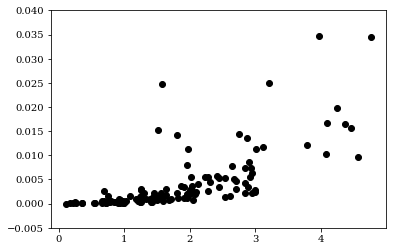

In [425]:
plt.plot(z_Lim, L_1d4GHz_cgs/L_sun, 'ko')
# plt.xlim(-0.01, 0.4)
plt.ylim(-0.005, 0.04)

(-0.005, 0.05)

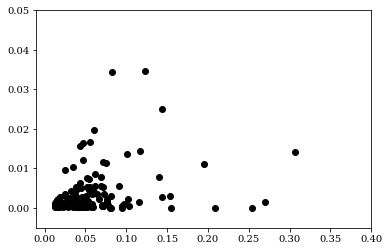

In [426]:
plt.plot(S_1d4GHz_uJy/1e3, L_1d4GHz_cgs/L_sun, 'ko')
plt.xlim(-0.01, 0.4)
plt.ylim(-0.005, 0.05)

In [465]:
fn_bin = '%sS_Lim_coord3GHz_sortReshift_mediam_bin20gp7_bm10.0_thIsl5_thPix5.csv'%(PATH_TABLE) 
df_bin = pd.read_csv(fn_bin)


S1d4GHz_bin = df_bin['S_1d4GHz_res_unres_arr']/1e3
S1d4GHz_err_bin = df_bin['S_1d4GHz_res_unres_err_arr']/1e3
S3GHz_bin = df_bin['S_3GHz_res_unres_arr']/1e3
S3GHz_err_bin = df_bin['S_3GHz_res_unres_err_arr']/1e3
alpha_bin = df_bin['spec_ind_3_1d4_arr']
alpha_err_bin = df_bin['spec_ind_3_1d4_err_arr']
z_bin       = df_bin['z_bin']
z_err_bin   = df_bin['z_bin_err']
q_IR_bin     = df_bin['qIR']
q_IR_err_bin = df_bin['qIR_err']

is_binGao = True
# plt.plot(df_bin['z_bin'], df_bin['spec_ind_3_1d4_arr'], 'ko')
# plt.xlim(xlim_low, xlim_up)
# plt.ylim(ylim_low, ylim_up)

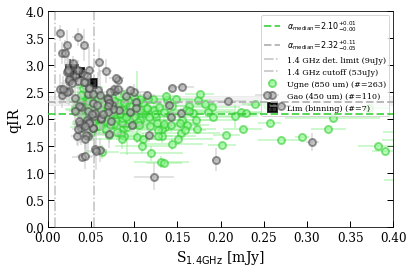

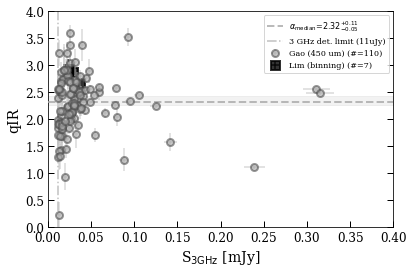

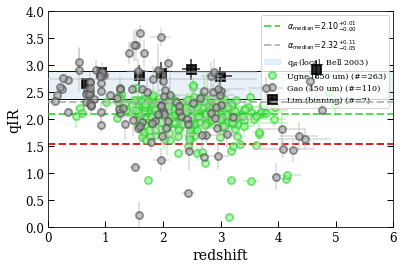

In [467]:
# plot_freq = '1d4GHz'
# plot_freq = '3GHz'

for plot_freq in ['1d4GHz', '3GHz', 'redshift']:
    S_3GHZ_DET_LIMIT        = 5*2.3e-3      # 5 sigma detection limit (mJy/beam), from Smolčić+17
    S_1d4GHZ_DET_LIMIT      = 5*1.8e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10
    # S_1d4GHZ_DET_LIMIT      = 4*12e-3       # 4 sigma detection limit (mJy/beam), from Schinnerer+10


    if plot_freq == '1d4GHz':
        x_arr = x_lst
        xerr_arr = xerr_lst
        xlim_low, xlim_up = 0, 0.4
    elif plot_freq == '3GHz':
        x_arr = x2_lst
        xerr_arr = x2err_lst
        xlim_low, xlim_up = 0, 0.4
    elif plot_freq == 'redshift':
        x_arr = x3_lst
        xerr_arr = x3err_lst
        xlim_low, xlim_up = 0, 6

    y_arr = y_lst
    yerr_arr = yerr_lst

    fig = plt.figure()
    plt.rcParams["font.family"] = "serif"
    ax  = fig.add_axes([0.12,0.12,0.8,0.75]) # left, bottom, width, height (range 0 to 1)

    ylim_low, ylim_up = 0, 4
    
    if is_compare850:
        is_plot_compare850 = True
        if plot_freq == '1d4GHz':
            x_850_arr = S_1d4GHz_850
            xerr_850_arr = S_1d4GHz_err_850
        elif plot_freq == '3GHz':
            is_plot_compare850 = False
        elif plot_freq == 'redshift':
            x_850_arr = z_850
            xerr_850_arr = z_err_850
        y_850_arr = q_IR_850
        yerr_850_arr = q_IR_err_850
        if is_plot_compare850:
            ax.errorbar(x_850_arr, y_850_arr, 
                        xerr=xerr_850_arr, 
                        yerr=yerr_850_arr,
                        fmt='o', color='palegreen', ecolor ='lightgreen', alpha=0.6, #zorder = 20,
                        markersize=7, markeredgecolor='limegreen', markeredgewidth=2,
                        label='Ugne (850 um) (#=%d)'%(np.shape(y_850_arr)[0])
                        )
            x_line = np.linspace(xlim_low, xlim_up, 100)
            try:
                med_arr = y_850_arr.to_numpy()
            except AttributeError:
                med_arr = y_850_arr
            median, median_bs = bootstrap_error(arr=med_arr, number=1000)
            bs_low, bs_up     = median_bs[0], median_bs[1]
            ax.plot(x_line, x_line*0 + median, 
                    linestyle='--', linewidth=2, color = 'limegreen', alpha = 0.8, zorder=10,\
                    label=r'$\alpha_{\rm median}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
                   )
            

    for i in range(len(x_arr)): 
        y_arr[i] = np.where(yerr_arr[i]==0, np.nan,
                            np.where(x_arr[i].notna(), y_arr[i], np.nan))

        ax.errorbar(x_arr[i], y_arr[i], 
                    xerr=xerr_arr[i], 
                    yerr=yerr_arr[i], 
                    fmt=marker_lst[i], color=color[i], ecolor =ecolor[i], alpha=0.6, zorder = 20,
                    markersize=7, markeredgecolor=mcolor[i], markeredgewidth=2,
                    label='%s (#=%d)'%(label_lst[i], len(y_arr[i])-np.isnan(y_arr[i]).sum())
                    )

        x_line = np.linspace(xlim_low, xlim_up, 100)
        try:
            med_arr = y_arr[i].to_numpy()
        except AttributeError:
            med_arr = y_arr[i]
        median, median_bs = bootstrap_error(arr=med_arr, number=1000)
        bs_low, bs_up     = median_bs[0], median_bs[1]
        ax.plot(x_line, x_line*0 + median, 
                linestyle='--', linewidth=2, color = color[i], alpha = 0.8, zorder=10,\
                label=r'$\alpha_{\rm median}$=$%.2f^{+%.2f}_{%.2f}$'%(median, bs_up, bs_low),\
               )
        if plot_freq != 'redshift':
            ax.fill_between(x_line, median + bs_up, median + bs_low, color=ecolor[i], alpha=0.2)

    if plot_freq == '1d4GHz':
        ax.set_xlabel(r'S$_{\rm 1.4 GHz}$ [mJy]', fontsize=14)

        # plot the 1.4 GHz threshold
        y_plot_arr = np.linspace(ylim_low, ylim_up, 50)   
        ax.plot(y_plot_arr*0+S_1d4GHZ_DET_LIMIT, y_plot_arr, color='silver', linestyle='-.', 
                label=r'1.4 GHz det. limit (%duJy)'%(S_1d4GHZ_DET_LIMIT*1e3)
               )

        # plot the 1.4 GHz cutoff
#         y_plot_arr = np.linspace(ylim_low, ylim_up, 50)  
#         thld_S1d4GHzDet = 6
        ax.plot(y_plot_arr*0+S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet, y_plot_arr, color='silver', linestyle='-.', 
                label=r'1.4 GHz cutoff (%duJy)'%(S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet*1e3)
               )


    elif plot_freq == '3GHz':

        ax.set_xlabel(r'S$_{\rm 3 GHz}$ [mJy]', fontsize=14)

        # plot the 3 GHz threshold
        y_plot_arr = np.linspace(ylim_low, ylim_up, 50)   
        ax.plot(y_plot_arr*0+S_3GHZ_DET_LIMIT, y_plot_arr, color='silver', linestyle='-.', 
                label=r'3 GHz det. limit (%duJy)'%(S_3GHZ_DET_LIMIT*1e3)
               )
        
    elif plot_freq == 'redshift':

        ax.set_xlabel('redshift', fontsize=14)
        
        # Local value
        x = np.linspace(xlim_low, xlim_up, 20)
        y1_Bell_03 = x*0 + 2.64 + 0.26
        y2_Bell_03 = x*0 + 2.64 - 0.26
        ax.plot(x, y1_Bell_03, '-', color='navy', linewidth=1)
        ax.plot(x, y2_Bell_03, '-', color='navy', linewidth=1)
        ax.fill_between(x, y1_Bell_03, y2_Bell_03, color='tab:blue', alpha=0.1, \
                        label = r'q$_{IR}$(local, Bell 2003)',\
                       )
        
        ax.plot(x, x*0+1.55, '--', color='tab:red', linewidth=2)

    if is_binGao:
        is_plot_binGao = True
        if plot_freq == '1d4GHz':
            x_bin_arr = S1d4GHz_bin
            xerr_bin_arr = S1d4GHz_err_bin
        elif plot_freq == '3GHz':
            x_bin_arr = S3GHz_bin
            xerr_bin_arr = S3GHz_err_bin
        elif plot_freq == 'redshift':
            x_bin_arr = z_bin
            xerr_bin_arr = z_err_bin
        y_bin_arr = q_IR_bin
        yerr_bin_arr = q_IR_err_bin
        if is_plot_binGao:
            ax.errorbar(x_bin_arr, y_bin_arr, 
                        xerr=xerr_bin_arr, 
                        yerr=yerr_bin_arr,
                        fmt='s', color='k', ecolor ='k', alpha=0.8, zorder = 10,
                        markersize=9, markeredgecolor='k', markeredgewidth=2,
                        label='Lim (binning) (#=%d)'%(np.shape(y_bin_arr)[0])
                        )

#     ax.set_ylabel(r'spectral index $\alpha$', fontsize=14)
    ax.set_ylabel('qIR', fontsize=14)
    ax.set_xlim(xlim_low, xlim_up)
    ax.set_ylim(ylim_low, ylim_up)
    ax.tick_params(which='major', direction='in', length=6, width=1, labelsize=12, top=False, right=True)
    ax.tick_params(which='minor', direction='in', length=4, width=1, labelsize=12, top=False, right=True)
    plt.legend(fontsize=8, loc='upper right')
    plt.savefig('%s_%s.pdf'%(fn_savefig, plot_freq))    
    plt.show()

(0.0, 4.0)

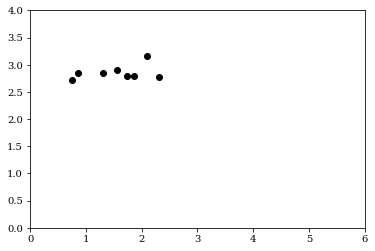

In [439]:
fn_bin = '%sS_Gao4SNR_coord3GHz_sort3GHz_nAGN_mediam_bin20gp8_bm10.0_thIsl5_thPix5.csv'%(PATH_TABLE) 
df_bin = pd.read_csv(fn_bin) 

plt.plot(df_bin['z_bin'], df_bin['qIR'], 'ko')
plt.xlim(xlim_low, xlim_up)
plt.ylim(ylim_low, ylim_up)

In [ ]:
# df_450um_Gao = df_450um_Ugne

# sample = 'Gao_diffSNR'
# sample = 'Gao_diffSNR_S1d4GHzthld'
# sample = 'Gao5SNR_diffAGN'
# sample = 'Gao5SNR_diffAGN_S1d4GHzthld'




if sample == 'Gao_diffSNR':
    snr_thld_lst = [3.5, 4, 5]
    label_lst = ['SNR>3.5', 'SNR>4', 'SNR>5']
    marker_lst = ['o']*3
    mcolor = ['darkviolet', 'navy', '#4F4F4F']
    ecolor = ['violet', 'lightblue', 'silver']
    color  = ['violet', 'royalblue', 'darkgray']
    fn_savefig = '%scosmos_450um_alpha_sltSNR'%(PATH_FIGURE)
elif sample == 'Gao_diffSNR_S1d4GHzthld':
    snr_thld_lst = [3.5, 4, 5]
    thld_S1d4GHzDet = 6
    label_lst = ['SNR>3.5', 'SNR>4', 'SNR>5']
    marker_lst = ['o']*3
    mcolor = ['darkviolet', 'navy', '#4F4F4F']
    ecolor = ['violet', 'lightblue', 'silver']
    color  = ['violet', 'royalblue', 'darkgray']
    fn_savefig = '%scosmos_450um_alpha_sltSNR_S1d4GHzthld%dsnr'%(PATH_FIGURE, thld_S1d4GHzDet)  
elif sample == 'Gao5SNR_diffAGN':
    snr_thld = 5
    column_AGN_lst = [None, 'nAGN', 'XrayAGN_3GHz_multiAGN', 'MIRAGN_3GHz_multiAGN', 'SEDAGN_3GHz_multiAGN', 'RExcess_3GHz_multiAGN']
    label_lst = ['All', 'nAGN', 'XrayAGN', 'MIRAGN', 'SEDAGN', 'RExcess']
    marker_lst = ['o', 'o', 's', 'v', '^', 'D']
    mcolor = ['#4F4F4F', '#4F4F4F', 'darkviolet',  'C1', 'navy', 'C3' ]
    ecolor = ['silver', 'silver', 'violet',  'C1', 'lightblue',  'lightcoral' ]
    color  = ['darkgray', 'darkgray', 'violet',  'C1', 'royalblue',   'salmon' ]
    fn_savefig = '%scosmos_450um_alpha_sltAGN'%(PATH_FIGURE)
elif sample == 'Gao5SNR_diffAGN_S1d4GHzthld':
    snr_thld = 5
    thld_S1d4GHzDet = 6
    column_AGN_lst = [None, 'nAGN', 'XrayAGN_3GHz_multiAGN', 'MIRAGN_3GHz_multiAGN', 'SEDAGN_3GHz_multiAGN', 'RExcess_3GHz_multiAGN']
    label_lst = ['All', 'nAGN', 'XrayAGN', 'MIRAGN', 'SEDAGN', 'RExcess']
    marker_lst = ['o', 'o', 's', 'v', '^', 'D']
    mcolor = ['#4F4F4F', '#4F4F4F', 'darkviolet',  'C1', 'navy', 'C3' ]
    ecolor = ['silver', 'silver', 'violet',  'C1', 'lightblue',  'lightcoral' ]
    color  = ['darkgray', 'darkgray', 'violet',  'C1', 'royalblue',   'salmon' ]
    fn_savefig = '%scosmos_450um_alpha_sltAGN_S1d4GHzthld%dsnr'%(PATH_FIGURE, thld_S1d4GHzDet)

x_lst, xerr_lst, y_lst, yerr_lst = [], [], [], []
x2_lst, x2err_lst = [], []
for i, label in enumerate(label_lst):
   
    if sample == 'Gao_diffSNR': 
        snr_thld = snr_thld_lst[i]
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        slt_crit = slt_snr
    elif sample == 'Gao_diffSNR_S1d4GHzthld':    
        snr_thld = snr_thld_lst[i]
        slt_snr  = df_450um_Gao['SNR_450']>snr_thld
        slt_thld = df_450um_Gao['Flux_corr_1d4GHz']*1e3>S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet
        slt_crit = slt_snr & slt_thld
    elif sample == 'Gao5SNR_diffAGN':
        column_AGN = column_AGN_lst[i]
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        if column_AGN is None:
            slt_crit = slt_snr
        elif column_AGN == 'nAGN':
            slt_agn   = ~(df_450um_Gao[column_AGN_lst[2]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[3]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[4]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[5]] == True) 
            slt_crit = slt_snr & slt_agn
        else:
            slt_agn   = df_450um_Gao[column_AGN] == True
            slt_crit = slt_snr & slt_agn
    elif sample == 'Gao5SNR_diffAGN_S1d4GHzthld':
        column_AGN = column_AGN_lst[i]
        slt_snr   = df_450um_Gao['SNR_450']>snr_thld
        slt_thld = df_450um_Gao['Flux_corr_1d4GHz']*1e3>S_1d4GHZ_DET_LIMIT*thld_S1d4GHzDet
        if column_AGN is None:
            slt_crit = slt_snr & slt_thld
        elif column_AGN == 'nAGN':
            slt_agn   = ~(df_450um_Gao[column_AGN_lst[2]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[3]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[4]] == True) &\
                        ~(df_450um_Gao[column_AGN_lst[5]] == True) 
            slt_crit = slt_snr & slt_agn & slt_thld
        else:
            slt_agn   = df_450um_Gao[column_AGN] == True
            slt_crit = slt_snr & slt_agn & slt_thld
    
    # slt_det1d4_3 = df_450um_Gao['flux_3GHz'].notna() & df_450um_Gao['Flux_corr_1d4GHz'].notna()
    S_1d4GHz_Gao     = df_450um_Gao[slt_crit]['Flux_corr_1d4GHz']*1e3 # mJy
    S_1d4GHz_err_Gao = df_450um_Gao[slt_crit]['Eflux_corr_1d4GHz']*1e3 # mJy
    S_3GHz_Gao       = df_450um_Gao[slt_crit]['flux_3GHz']/1e3 # mJy
    S_3GHz_err_Gao   = df_450um_Gao[slt_crit]['flux_err_3GHz']/1e3 # mJy
    alpha_Gao        = df_450um_Gao[slt_crit]['alpha_3_1d4'] # mJy
    alpha_err_Gao    = df_450um_Gao[slt_crit]['alpha_3_1d4_err'] # mJy

    x_lst.append(S_1d4GHz_Gao)
    xerr_lst.append(S_1d4GHz_err_Gao)
    x2_lst.append(S_3GHz_Gao)
    x2err_lst.append(S_3GHz_err_Gao)
    y_lst.append(alpha_Gao)
    yerr_lst.append(alpha_err_Gao)
    
if plot_freq == '1d4GHz':
    x_arr = x_lst
    xerr_arr = xerr_lst
elif plot_freq == '3GHz':
    x_arr = x2_lst
    xerr_arr = x2err_lst
y_arr    = y_lst
yerr_arr = yerr_lst

In [ ]:
S_3GHz_Ugne   = df_450um_Ugne['flux_3GHz']/1e3   # uJy -> mJy
# S_1d4GHz_Ugne = df_450um_Ugne['flux_1d4GHz'] # mJy
S_1d4GHz_Ugne = df_450um_Ugne['Flux_corr_1d4GHz']*1e3 # Jy -> mJy
alpha_Ugne = cal_spcetral_index(S_3GHz_Ugne, 3, S_1d4GHz_Ugne, 1.4)

S_3GHz_Lim   = df_450um_Lim['flux_3GHz']/1e3   # uJy -> mJy
# S_1d4GHz_Lim = df_450um_Lim['flux_1d4GHz'] # mJy
S_1d4GHz_Lim = df_450um_Lim['Flux_corr_1d4GHz']*1e3 # Jy -> mJy
alpha_Lim = cal_spcetral_index(S_3GHz_Lim, 3, S_1d4GHz_Lim, 1.4)

S_3GHz_Gao   = df_450um_Gao['flux_3GHz']/1e3   # mJy
# S_1d4GHz_Gao = df_450um_Gao['flux_1d4GHz'] # mJy
S_1d4GHz_Gao = df_450um_Gao['Flux_corr_1d4GHz']*1e3 # mJy
alpha_Gao = cal_spcetral_index(S_3GHz_Gao, 3, S_1d4GHz_Gao, 1.4)